In [1]:
import sys
sys.path.insert(1, 'source')

FORCE = False

In [2]:
from util import getHash

name = 'FNN-Classification-Simple'

props={
    'path'          : 'source/data',
    'seed'          : 42,
    'split'         : 0.8,
    'test_split'    : 0.5,
    'control'       : False,
    'huntington'    : True,
    'left'          : True,
    'right'         : False,
    'threshold'     : 0.7,
    'binarize'      : True,
    'not_connected' : True,
    'single'        : None,
    'target'        : False,
    'roi'           : True,
    'brain'         : False,
    'features'      : [],
    'features_vox'  : [],
    'radiomics'     : ['b25'],
    'radiomics_vox' : ['k5_b25','k7_b25','k9_b25','k11_b25','k13_b25'],
    'balance_data'  : True,
    'debug'         : False,
    'targets_all'   : False,
    'collapse_max'  : False,
    'extras'        : None,
}

architecture={
    'activation'    : 'sigmoid',
    'layers'        : [2048,1024,512,256,128],
    'loss'          : 'CCE',
    'learning_rate' : 0.001,
    'batch_size'    : 100000,
    'patience'      : 10,
}

HASH = getHash(name,[architecture,props])
print(HASH)

FNN-Classification-Simple-sigmoid_100000_20481024512256128_0001_CCE_10_1_1_0_0_0_0_None___1_1_1_sourcedata_b25_k5_b25k7_b25k9_b25k11_b25k13_b25_0_1_42_None_08_0_0_05_07


In [3]:
from DataGeneratorClassificationFNN import DataGenerator

gen = DataGenerator(**props)
train, val, test = gen.getData()

print('train')
print(train[0].shape)
print(train[1].shape)
print('validation')
print(val[0].shape)
print(val[1].shape)
print('test')
print(test[0].shape)
print(test[1].shape)

train
(1670790, 566)
(1670790, 8)
validation
(248621, 566)
(248621, 8)
test
(202983, 566)
(202983, 8)


In [4]:
from ModelClassificationFNN import *
from tensorflow.keras.optimizers import Adam

stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=architecture['patience'],
)
save = tf.keras.callbacks.ModelCheckpoint(
    filepath='source/data/models/{}.weights.h5'.format(HASH),
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
)

model = buildModel(train[0].shape[1], train[1].shape[1], activation=architecture['activation'], layers=architecture['layers'])

model.compile(loss=locals()[architecture['loss']], optimizer=Adam(learning_rate=architecture['learning_rate']), jit_compile=True, metrics=[STD,MAE])

model.summary()

Model: "FFN"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 input_1 (InputLayer)        [(None, 566)]             0         


 dense (Dense)               (None, 2048)              1161216   


 dense_1 (Dense)             (None, 1024)              2098176   


 dense_2 (Dense)             (None, 512)               524800    


 dense_3 (Dense)             (None, 256)               131328    


 dense_4 (Dense)             (None, 128)               32896     


 dense_5 (Dense)             (None, 8)                 1032      


Total params: 3949448 (15.07 MB)


Trainable params: 3949448 (15.07 MB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


In [5]:
import os
from util import pickleSave

if FORCE or not os.path.exists('source/data/models/{}.pkl'.format(HASH)):
    history = model.fit(DataWrapper(train,architecture['batch_size']),
        validation_data=DataWrapper(val,architecture['batch_size'],False),
        epochs=10000,
        verbose=1,
        callbacks = [save,stop],
    )
    pickleSave('source/data/models/{}.pkl'.format(HASH), history.history)

model.load_weights('source/data/models/{}.weights.h5'.format(HASH))

Epoch 1/10000


 1/17 [>.............................] - ETA: 2:24 - loss: 2.2154 - STD: 0.0691 - MAE: 0.2188

 2/17 [==>...........................] - ETA: 4s - loss: 2.1573 - STD: 0.0463 - MAE: 0.2188  

 3/17 [====>.........................] - ETA: 4s - loss: 2.1328 - STD: 0.0362 - MAE: 0.2187

 4/17 [======>.......................] - ETA: 4s - loss: 2.1246 - STD: 0.0337 - MAE: 0.2187

 5/17 [=======>......................] - ETA: 21s - loss: 2.1227 - STD: 0.0335 - MAE: 0.2187

 6/17 [=========>....................] - ETA: 16s - loss: 2.1207 - STD: 0.0334 - MAE: 0.2187

 7/17 [===========>..................] - ETA: 12s - loss: 2.1178 - STD: 0.0327 - MAE: 0.2187

 8/17 [=============>................] - ETA: 10s - loss: 2.1142 - STD: 0.0314 - MAE: 0.2186

 9/17 [==============>...............] - ETA: 8s - loss: 2.1104 - STD: 0.0295 - MAE: 0.2186 

10/17 [================>.............] - ETA: 6s - loss: 2.1071 - STD: 0.0274 - MAE: 0.2186

11/17 [==================>...........] - ETA: 5s - loss: 2.1045 - STD: 0.0257 - MAE: 0.2186

12/17 [====================>.........] - ETA: 4s - loss: 2.1026 - STD: 0.0246 - MAE: 0.2186

13/17 [=====================>........] - ETA: 3s - loss: 2.1013 - STD: 0.0239 - MAE: 0.2186

14/17 [=======================>......] - ETA: 2s - loss: 2.1004 - STD: 0.0235 - MAE: 0.2187

15/17 [=========================>....] - ETA: 1s - loss: 2.0995 - STD: 0.0231 - MAE: 0.2187

16/17 [===========================>..] - ETA: 0s - loss: 2.0986 - STD: 0.0226 - MAE: 0.2187

17/17 [==============================] - ETA: 0s - loss: 2.0976 - STD: 0.0220 - MAE: 0.2187

17/17 [==============================] - 23s 862ms/step - loss: 2.0976 - STD: 0.0220 - MAE: 0.2187 - val_loss: 2.0814 - val_STD: 0.0103 - val_MAE: 0.2187


Epoch 2/10000


 1/17 [>.............................] - ETA: 7s - loss: 2.0805 - STD: 0.0103 - MAE: 0.2187

 2/17 [==>...........................] - ETA: 3s - loss: 2.0795 - STD: 0.0093 - MAE: 0.2187

 3/17 [====>.........................] - ETA: 4s - loss: 2.0790 - STD: 0.0088 - MAE: 0.2187

 4/17 [======>.......................] - ETA: 3s - loss: 2.0788 - STD: 0.0087 - MAE: 0.2186

 5/17 [=======>......................] - ETA: 3s - loss: 2.0790 - STD: 0.0090 - MAE: 0.2187

 6/17 [=========>....................] - ETA: 3s - loss: 2.0793 - STD: 0.0095 - MAE: 0.2187

 7/17 [===========>..................] - ETA: 3s - loss: 2.0795 - STD: 0.0099 - MAE: 0.2186

 8/17 [=============>................] - ETA: 2s - loss: 2.0797 - STD: 0.0103 - MAE: 0.2186

 9/17 [==============>...............] - ETA: 2s - loss: 2.0797 - STD: 0.0106 - MAE: 0.2186

10/17 [================>.............] - ETA: 2s - loss: 2.0797 - STD: 0.0107 - MAE: 0.2186

11/17 [==================>...........] - ETA: 1s - loss: 2.0796 - STD: 0.0106 - MAE: 0.2186

12/17 [====================>.........] - ETA: 1s - loss: 2.0795 - STD: 0.0104 - MAE: 0.2186

13/17 [=====================>........] - ETA: 1s - loss: 2.0793 - STD: 0.0101 - MAE: 0.2186

14/17 [=======================>......] - ETA: 0s - loss: 2.0792 - STD: 0.0099 - MAE: 0.2186

15/17 [=========================>....] - ETA: 0s - loss: 2.0791 - STD: 0.0096 - MAE: 0.2186

16/17 [===========================>..] - ETA: 0s - loss: 2.0791 - STD: 0.0095 - MAE: 0.2186

17/17 [==============================] - ETA: 0s - loss: 2.0790 - STD: 0.0094 - MAE: 0.2186

17/17 [==============================] - 6s 374ms/step - loss: 2.0790 - STD: 0.0094 - MAE: 0.2186 - val_loss: 2.0795 - val_STD: 0.0090 - val_MAE: 0.2187


Epoch 3/10000


 1/17 [>.............................] - ETA: 7s - loss: 2.0783 - STD: 0.0090 - MAE: 0.2186

 2/17 [==>...........................] - ETA: 5s - loss: 2.0783 - STD: 0.0088 - MAE: 0.2186

 3/17 [====>.........................] - ETA: 4s - loss: 2.0782 - STD: 0.0085 - MAE: 0.2186

 4/17 [======>.......................] - ETA: 3s - loss: 2.0780 - STD: 0.0081 - MAE: 0.2186

 5/17 [=======>......................] - ETA: 3s - loss: 2.0778 - STD: 0.0077 - MAE: 0.2186

 6/17 [=========>....................] - ETA: 3s - loss: 2.0776 - STD: 0.0075 - MAE: 0.2186

 7/17 [===========>..................] - ETA: 3s - loss: 2.0775 - STD: 0.0074 - MAE: 0.2186

 8/17 [=============>................] - ETA: 2s - loss: 2.0774 - STD: 0.0075 - MAE: 0.2186

 9/17 [==============>...............] - ETA: 2s - loss: 2.0772 - STD: 0.0076 - MAE: 0.2186

10/17 [================>.............] - ETA: 2s - loss: 2.0771 - STD: 0.0077 - MAE: 0.2186

11/17 [==================>...........] - ETA: 1s - loss: 2.0769 - STD: 0.0078 - MAE: 0.2186

12/17 [====================>.........] - ETA: 1s - loss: 2.0767 - STD: 0.0078 - MAE: 0.2186

13/17 [=====================>........] - ETA: 1s - loss: 2.0765 - STD: 0.0078 - MAE: 0.2186

14/17 [=======================>......] - ETA: 0s - loss: 2.0761 - STD: 0.0078 - MAE: 0.2186

15/17 [=========================>....] - ETA: 0s - loss: 2.0757 - STD: 0.0078 - MAE: 0.2186

16/17 [===========================>..] - ETA: 0s - loss: 2.0752 - STD: 0.0078 - MAE: 0.2186

17/17 [==============================] - ETA: 0s - loss: 2.0746 - STD: 0.0078 - MAE: 0.2185

17/17 [==============================] - 6s 369ms/step - loss: 2.0746 - STD: 0.0078 - MAE: 0.2185 - val_loss: 2.0610 - val_STD: 0.0083 - val_MAE: 0.2181


Epoch 4/10000


 1/17 [>.............................] - ETA: 7s - loss: 2.0611 - STD: 0.0084 - MAE: 0.2181

 2/17 [==>...........................] - ETA: 5s - loss: 2.0588 - STD: 0.0088 - MAE: 0.2180

 3/17 [====>.........................] - ETA: 4s - loss: 2.0559 - STD: 0.0091 - MAE: 0.2179

 4/17 [======>.......................] - ETA: 4s - loss: 2.0524 - STD: 0.0097 - MAE: 0.2178

 5/17 [=======>......................] - ETA: 4s - loss: 2.0483 - STD: 0.0106 - MAE: 0.2177

 6/17 [=========>....................] - ETA: 3s - loss: 2.0436 - STD: 0.0117 - MAE: 0.2175

 7/17 [===========>..................] - ETA: 3s - loss: 2.0384 - STD: 0.0132 - MAE: 0.2173

 8/17 [=============>................] - ETA: 3s - loss: 2.0327 - STD: 0.0147 - MAE: 0.2170

 9/17 [==============>...............] - ETA: 2s - loss: 2.0269 - STD: 0.0166 - MAE: 0.2168

10/17 [================>.............] - ETA: 2s - loss: 2.0208 - STD: 0.0185 - MAE: 0.2165

11/17 [==================>...........] - ETA: 1s - loss: 2.0163 - STD: 0.0207 - MAE: 0.2162

12/17 [====================>.........] - ETA: 1s - loss: 2.0099 - STD: 0.0229 - MAE: 0.2158

13/17 [=====================>........] - ETA: 1s - loss: 2.0036 - STD: 0.0253 - MAE: 0.2155

14/17 [=======================>......] - ETA: 0s - loss: 1.9976 - STD: 0.0276 - MAE: 0.2151

15/17 [=========================>....] - ETA: 0s - loss: 1.9920 - STD: 0.0300 - MAE: 0.2147

16/17 [===========================>..] - ETA: 0s - loss: 1.9869 - STD: 0.0322 - MAE: 0.2144

17/17 [==============================] - ETA: 0s - loss: 1.9821 - STD: 0.0345 - MAE: 0.2140

17/17 [==============================] - 6s 369ms/step - loss: 1.9821 - STD: 0.0345 - MAE: 0.2140 - val_loss: 1.8767 - val_STD: 0.0711 - val_MAE: 0.2073


Epoch 5/10000


 1/17 [>.............................] - ETA: 9s - loss: 1.8955 - STD: 0.0695 - MAE: 0.2080

 2/17 [==>...........................] - ETA: 5s - loss: 1.8927 - STD: 0.0706 - MAE: 0.2078

 3/17 [====>.........................] - ETA: 4s - loss: 1.8891 - STD: 0.0720 - MAE: 0.2075

 4/17 [======>.......................] - ETA: 4s - loss: 1.8873 - STD: 0.0718 - MAE: 0.2075

 5/17 [=======>......................] - ETA: 4s - loss: 1.8848 - STD: 0.0728 - MAE: 0.2073

 6/17 [=========>....................] - ETA: 3s - loss: 1.8828 - STD: 0.0726 - MAE: 0.2073

 7/17 [===========>..................] - ETA: 3s - loss: 1.8803 - STD: 0.0729 - MAE: 0.2072

 8/17 [=============>................] - ETA: 3s - loss: 1.8779 - STD: 0.0733 - MAE: 0.2071

 9/17 [==============>...............] - ETA: 2s - loss: 1.8765 - STD: 0.0734 - MAE: 0.2070

10/17 [================>.............] - ETA: 2s - loss: 1.8750 - STD: 0.0740 - MAE: 0.2069

11/17 [==================>...........] - ETA: 1s - loss: 1.8736 - STD: 0.0741 - MAE: 0.2068

12/17 [====================>.........] - ETA: 1s - loss: 1.8716 - STD: 0.0746 - MAE: 0.2067

13/17 [=====================>........] - ETA: 1s - loss: 1.8695 - STD: 0.0752 - MAE: 0.2065

14/17 [=======================>......] - ETA: 0s - loss: 1.8684 - STD: 0.0755 - MAE: 0.2065

15/17 [=========================>....] - ETA: 0s - loss: 1.8668 - STD: 0.0761 - MAE: 0.2063

16/17 [===========================>..] - ETA: 0s - loss: 1.8648 - STD: 0.0766 - MAE: 0.2062

17/17 [==============================] - ETA: 0s - loss: 1.8634 - STD: 0.0769 - MAE: 0.2061

17/17 [==============================] - 6s 370ms/step - loss: 1.8634 - STD: 0.0769 - MAE: 0.2061 - val_loss: 1.8473 - val_STD: 0.0883 - val_MAE: 0.2039


Epoch 6/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.8358 - STD: 0.0848 - MAE: 0.2041

 2/17 [==>...........................] - ETA: 5s - loss: 1.8315 - STD: 0.0839 - MAE: 0.2042

 3/17 [====>.........................] - ETA: 4s - loss: 1.8304 - STD: 0.0833 - MAE: 0.2042

 4/17 [======>.......................] - ETA: 4s - loss: 1.8291 - STD: 0.0841 - MAE: 0.2041

 5/17 [=======>......................] - ETA: 4s - loss: 1.8272 - STD: 0.0839 - MAE: 0.2040

 6/17 [=========>....................] - ETA: 3s - loss: 1.8261 - STD: 0.0839 - MAE: 0.2040

 7/17 [===========>..................] - ETA: 3s - loss: 1.8243 - STD: 0.0841 - MAE: 0.2039

 8/17 [=============>................] - ETA: 2s - loss: 1.8225 - STD: 0.0841 - MAE: 0.2039

 9/17 [==============>...............] - ETA: 2s - loss: 1.8206 - STD: 0.0844 - MAE: 0.2038

10/17 [================>.............] - ETA: 2s - loss: 1.8188 - STD: 0.0848 - MAE: 0.2037

11/17 [==================>...........] - ETA: 1s - loss: 1.8173 - STD: 0.0849 - MAE: 0.2036

12/17 [====================>.........] - ETA: 1s - loss: 1.8162 - STD: 0.0854 - MAE: 0.2035

13/17 [=====================>........] - ETA: 1s - loss: 1.8149 - STD: 0.0855 - MAE: 0.2034

14/17 [=======================>......] - ETA: 0s - loss: 1.8130 - STD: 0.0859 - MAE: 0.2033

15/17 [=========================>....] - ETA: 0s - loss: 1.8109 - STD: 0.0861 - MAE: 0.2032

16/17 [===========================>..] - ETA: 0s - loss: 1.8086 - STD: 0.0864 - MAE: 0.2031

17/17 [==============================] - ETA: 0s - loss: 1.8067 - STD: 0.0868 - MAE: 0.2030

17/17 [==============================] - 7s 379ms/step - loss: 1.8067 - STD: 0.0868 - MAE: 0.2030 - val_loss: 1.7642 - val_STD: 0.0919 - val_MAE: 0.2009


Epoch 7/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.7814 - STD: 0.0893 - MAE: 0.2018

 2/17 [==>...........................] - ETA: 5s - loss: 1.7904 - STD: 0.0925 - MAE: 0.2016

 3/17 [====>.........................] - ETA: 4s - loss: 1.7964 - STD: 0.0911 - MAE: 0.2020

 4/17 [======>.......................] - ETA: 4s - loss: 1.7875 - STD: 0.0913 - MAE: 0.2017

 5/17 [=======>......................] - ETA: 4s - loss: 1.7839 - STD: 0.0919 - MAE: 0.2015

 6/17 [=========>....................] - ETA: 3s - loss: 1.7875 - STD: 0.0916 - MAE: 0.2016

 7/17 [===========>..................] - ETA: 3s - loss: 1.7820 - STD: 0.0920 - MAE: 0.2014

 8/17 [=============>................] - ETA: 3s - loss: 1.7804 - STD: 0.0926 - MAE: 0.2013

 9/17 [==============>...............] - ETA: 2s - loss: 1.7812 - STD: 0.0925 - MAE: 0.2013

10/17 [================>.............] - ETA: 2s - loss: 1.7780 - STD: 0.0925 - MAE: 0.2012

11/17 [==================>...........] - ETA: 1s - loss: 1.7794 - STD: 0.0931 - MAE: 0.2011

12/17 [====================>.........] - ETA: 1s - loss: 1.7776 - STD: 0.0930 - MAE: 0.2011

13/17 [=====================>........] - ETA: 1s - loss: 1.7752 - STD: 0.0930 - MAE: 0.2010

14/17 [=======================>......] - ETA: 0s - loss: 1.7749 - STD: 0.0934 - MAE: 0.2009

15/17 [=========================>....] - ETA: 0s - loss: 1.7720 - STD: 0.0935 - MAE: 0.2008

16/17 [===========================>..] - ETA: 0s - loss: 1.7714 - STD: 0.0935 - MAE: 0.2008

17/17 [==============================] - ETA: 0s - loss: 1.7691 - STD: 0.0936 - MAE: 0.2007

17/17 [==============================] - 6s 366ms/step - loss: 1.7691 - STD: 0.0936 - MAE: 0.2007 - val_loss: 1.7729 - val_STD: 0.0984 - val_MAE: 0.2003


Epoch 8/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.7371 - STD: 0.0970 - MAE: 0.1992

 2/17 [==>...........................] - ETA: 3s - loss: 1.7417 - STD: 0.0959 - MAE: 0.1995

 3/17 [====>.........................] - ETA: 4s - loss: 1.7354 - STD: 0.0960 - MAE: 0.1993

 4/17 [======>.......................] - ETA: 3s - loss: 1.7380 - STD: 0.0968 - MAE: 0.1992

 5/17 [=======>......................] - ETA: 3s - loss: 1.7340 - STD: 0.0968 - MAE: 0.1991

 6/17 [=========>....................] - ETA: 3s - loss: 1.7331 - STD: 0.0968 - MAE: 0.1991

 7/17 [===========>..................] - ETA: 3s - loss: 1.7325 - STD: 0.0971 - MAE: 0.1990

 8/17 [=============>................] - ETA: 2s - loss: 1.7299 - STD: 0.0973 - MAE: 0.1989

 9/17 [==============>...............] - ETA: 2s - loss: 1.7296 - STD: 0.0974 - MAE: 0.1989

10/17 [================>.............] - ETA: 2s - loss: 1.7281 - STD: 0.0975 - MAE: 0.1988

11/17 [==================>...........] - ETA: 1s - loss: 1.7265 - STD: 0.0977 - MAE: 0.1987

12/17 [====================>.........] - ETA: 1s - loss: 1.7256 - STD: 0.0978 - MAE: 0.1986

13/17 [=====================>........] - ETA: 1s - loss: 1.7240 - STD: 0.0979 - MAE: 0.1986

14/17 [=======================>......] - ETA: 0s - loss: 1.7232 - STD: 0.0981 - MAE: 0.1985

15/17 [=========================>....] - ETA: 0s - loss: 1.7222 - STD: 0.0983 - MAE: 0.1984

16/17 [===========================>..] - ETA: 0s - loss: 1.7206 - STD: 0.0984 - MAE: 0.1983

17/17 [==============================] - ETA: 0s - loss: 1.7197 - STD: 0.0987 - MAE: 0.1983

17/17 [==============================] - 6s 372ms/step - loss: 1.7197 - STD: 0.0987 - MAE: 0.1983 - val_loss: 1.7067 - val_STD: 0.1038 - val_MAE: 0.1970


Epoch 9/10000


 1/17 [>.............................] - ETA: 9s - loss: 1.7108 - STD: 0.1024 - MAE: 0.1972

 2/17 [==>...........................] - ETA: 5s - loss: 1.7017 - STD: 0.1025 - MAE: 0.1969

 3/17 [====>.........................] - ETA: 4s - loss: 1.7001 - STD: 0.1025 - MAE: 0.1969

 4/17 [======>.......................] - ETA: 4s - loss: 1.7007 - STD: 0.1026 - MAE: 0.1969

 5/17 [=======>......................] - ETA: 4s - loss: 1.6982 - STD: 0.1027 - MAE: 0.1968

 6/17 [=========>....................] - ETA: 3s - loss: 1.6974 - STD: 0.1028 - MAE: 0.1967

 7/17 [===========>..................] - ETA: 3s - loss: 1.6974 - STD: 0.1030 - MAE: 0.1967

 8/17 [=============>................] - ETA: 3s - loss: 1.6963 - STD: 0.1031 - MAE: 0.1966

 9/17 [==============>...............] - ETA: 2s - loss: 1.6948 - STD: 0.1033 - MAE: 0.1965

10/17 [================>.............] - ETA: 2s - loss: 1.6936 - STD: 0.1035 - MAE: 0.1965

11/17 [==================>...........] - ETA: 2s - loss: 1.6932 - STD: 0.1036 - MAE: 0.1964

12/17 [====================>.........] - ETA: 1s - loss: 1.6926 - STD: 0.1039 - MAE: 0.1963

13/17 [=====================>........] - ETA: 1s - loss: 1.6918 - STD: 0.1041 - MAE: 0.1963

14/17 [=======================>......] - ETA: 0s - loss: 1.6911 - STD: 0.1042 - MAE: 0.1962

15/17 [=========================>....] - ETA: 0s - loss: 1.6907 - STD: 0.1044 - MAE: 0.1962

16/17 [===========================>..] - ETA: 0s - loss: 1.6900 - STD: 0.1045 - MAE: 0.1961

17/17 [==============================] - ETA: 0s - loss: 1.6896 - STD: 0.1047 - MAE: 0.1961

17/17 [==============================] - 6s 371ms/step - loss: 1.6896 - STD: 0.1047 - MAE: 0.1961 - val_loss: 1.6968 - val_STD: 0.1076 - val_MAE: 0.1961


Epoch 10/10000


 1/17 [>.............................] - ETA: 5s - loss: 1.6743 - STD: 0.1073 - MAE: 0.1951

 2/17 [==>...........................] - ETA: 5s - loss: 1.6773 - STD: 0.1073 - MAE: 0.1951

 3/17 [====>.........................] - ETA: 4s - loss: 1.6779 - STD: 0.1075 - MAE: 0.1951

 4/17 [======>.......................] - ETA: 4s - loss: 1.6811 - STD: 0.1074 - MAE: 0.1952

 5/17 [=======>......................] - ETA: 4s - loss: 1.6857 - STD: 0.1077 - MAE: 0.1953

 6/17 [=========>....................] - ETA: 3s - loss: 1.6877 - STD: 0.1076 - MAE: 0.1954

 7/17 [===========>..................] - ETA: 3s - loss: 1.6864 - STD: 0.1076 - MAE: 0.1953

 8/17 [=============>................] - ETA: 3s - loss: 1.6846 - STD: 0.1075 - MAE: 0.1953

 9/17 [==============>...............] - ETA: 2s - loss: 1.6837 - STD: 0.1076 - MAE: 0.1952

10/17 [================>.............] - ETA: 2s - loss: 1.6843 - STD: 0.1079 - MAE: 0.1952

11/17 [==================>...........] - ETA: 2s - loss: 1.6850 - STD: 0.1079 - MAE: 0.1952

12/17 [====================>.........] - ETA: 1s - loss: 1.6842 - STD: 0.1079 - MAE: 0.1952

13/17 [=====================>........] - ETA: 1s - loss: 1.6829 - STD: 0.1079 - MAE: 0.1951

14/17 [=======================>......] - ETA: 1s - loss: 1.6822 - STD: 0.1080 - MAE: 0.1951

15/17 [=========================>....] - ETA: 0s - loss: 1.6824 - STD: 0.1081 - MAE: 0.1951

16/17 [===========================>..] - ETA: 0s - loss: 1.6817 - STD: 0.1082 - MAE: 0.1950

17/17 [==============================] - ETA: 0s - loss: 1.6808 - STD: 0.1082 - MAE: 0.1950

17/17 [==============================] - 7s 387ms/step - loss: 1.6808 - STD: 0.1082 - MAE: 0.1950 - val_loss: 1.6750 - val_STD: 0.1087 - val_MAE: 0.1950


Epoch 11/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.6729 - STD: 0.1085 - MAE: 0.1947

 2/17 [==>...........................] - ETA: 5s - loss: 1.6758 - STD: 0.1084 - MAE: 0.1948

 3/17 [====>.........................] - ETA: 4s - loss: 1.6740 - STD: 0.1090 - MAE: 0.1946

 4/17 [======>.......................] - ETA: 4s - loss: 1.6711 - STD: 0.1092 - MAE: 0.1945

 5/17 [=======>......................] - ETA: 4s - loss: 1.6704 - STD: 0.1093 - MAE: 0.1944

 6/17 [=========>....................] - ETA: 3s - loss: 1.6700 - STD: 0.1094 - MAE: 0.1944

 7/17 [===========>..................] - ETA: 3s - loss: 1.6703 - STD: 0.1092 - MAE: 0.1944

 8/17 [=============>................] - ETA: 3s - loss: 1.6698 - STD: 0.1093 - MAE: 0.1944

 9/17 [==============>...............] - ETA: 2s - loss: 1.6683 - STD: 0.1094 - MAE: 0.1943

10/17 [================>.............] - ETA: 2s - loss: 1.6675 - STD: 0.1095 - MAE: 0.1943

11/17 [==================>...........] - ETA: 2s - loss: 1.6676 - STD: 0.1096 - MAE: 0.1943

12/17 [====================>.........] - ETA: 1s - loss: 1.6672 - STD: 0.1096 - MAE: 0.1943

13/17 [=====================>........] - ETA: 1s - loss: 1.6663 - STD: 0.1097 - MAE: 0.1942

14/17 [=======================>......] - ETA: 1s - loss: 1.6655 - STD: 0.1098 - MAE: 0.1942

15/17 [=========================>....] - ETA: 0s - loss: 1.6649 - STD: 0.1099 - MAE: 0.1941

16/17 [===========================>..] - ETA: 0s - loss: 1.6645 - STD: 0.1099 - MAE: 0.1941

17/17 [==============================] - ETA: 0s - loss: 1.6642 - STD: 0.1100 - MAE: 0.1941

17/17 [==============================] - 6s 372ms/step - loss: 1.6642 - STD: 0.1100 - MAE: 0.1941 - val_loss: 1.6626 - val_STD: 0.1117 - val_MAE: 0.1939


Epoch 12/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.6584 - STD: 0.1113 - MAE: 0.1935

 2/17 [==>...........................] - ETA: 5s - loss: 1.6562 - STD: 0.1115 - MAE: 0.1934

 3/17 [====>.........................] - ETA: 4s - loss: 1.6528 - STD: 0.1114 - MAE: 0.1933

 4/17 [======>.......................] - ETA: 4s - loss: 1.6521 - STD: 0.1113 - MAE: 0.1934

 5/17 [=======>......................] - ETA: 4s - loss: 1.6523 - STD: 0.1112 - MAE: 0.1934

 6/17 [=========>....................] - ETA: 3s - loss: 1.6515 - STD: 0.1113 - MAE: 0.1933

 7/17 [===========>..................] - ETA: 3s - loss: 1.6515 - STD: 0.1113 - MAE: 0.1933

 8/17 [=============>................] - ETA: 3s - loss: 1.6511 - STD: 0.1114 - MAE: 0.1933

 9/17 [==============>...............] - ETA: 2s - loss: 1.6508 - STD: 0.1114 - MAE: 0.1933

10/17 [================>.............] - ETA: 2s - loss: 1.6510 - STD: 0.1115 - MAE: 0.1932

11/17 [==================>...........] - ETA: 2s - loss: 1.6514 - STD: 0.1115 - MAE: 0.1933

12/17 [====================>.........] - ETA: 1s - loss: 1.6521 - STD: 0.1116 - MAE: 0.1932

13/17 [=====================>........] - ETA: 1s - loss: 1.6535 - STD: 0.1116 - MAE: 0.1933

14/17 [=======================>......] - ETA: 1s - loss: 1.6546 - STD: 0.1117 - MAE: 0.1933

15/17 [=========================>....] - ETA: 0s - loss: 1.6545 - STD: 0.1115 - MAE: 0.1933

16/17 [===========================>..] - ETA: 0s - loss: 1.6537 - STD: 0.1116 - MAE: 0.1933

17/17 [==============================] - ETA: 0s - loss: 1.6527 - STD: 0.1117 - MAE: 0.1932

17/17 [==============================] - 7s 378ms/step - loss: 1.6527 - STD: 0.1117 - MAE: 0.1932 - val_loss: 1.6588 - val_STD: 0.1111 - val_MAE: 0.1939


Epoch 13/10000


 1/17 [>.............................] - ETA: 5s - loss: 1.6415 - STD: 0.1109 - MAE: 0.1929

 2/17 [==>...........................] - ETA: 5s - loss: 1.6367 - STD: 0.1111 - MAE: 0.1927

 3/17 [====>.........................] - ETA: 4s - loss: 1.6346 - STD: 0.1117 - MAE: 0.1925

 4/17 [======>.......................] - ETA: 4s - loss: 1.6332 - STD: 0.1120 - MAE: 0.1924

 5/17 [=======>......................] - ETA: 4s - loss: 1.6317 - STD: 0.1121 - MAE: 0.1923

 6/17 [=========>....................] - ETA: 3s - loss: 1.6309 - STD: 0.1122 - MAE: 0.1922

 7/17 [===========>..................] - ETA: 3s - loss: 1.6300 - STD: 0.1125 - MAE: 0.1921

 8/17 [=============>................] - ETA: 3s - loss: 1.6298 - STD: 0.1127 - MAE: 0.1920

 9/17 [==============>...............] - ETA: 2s - loss: 1.6300 - STD: 0.1127 - MAE: 0.1920

10/17 [================>.............] - ETA: 2s - loss: 1.6294 - STD: 0.1128 - MAE: 0.1920

11/17 [==================>...........] - ETA: 2s - loss: 1.6288 - STD: 0.1130 - MAE: 0.1919

12/17 [====================>.........] - ETA: 1s - loss: 1.6277 - STD: 0.1131 - MAE: 0.1918

13/17 [=====================>........] - ETA: 1s - loss: 1.6266 - STD: 0.1132 - MAE: 0.1917

14/17 [=======================>......] - ETA: 1s - loss: 1.6256 - STD: 0.1134 - MAE: 0.1916

15/17 [=========================>....] - ETA: 0s - loss: 1.6245 - STD: 0.1136 - MAE: 0.1915

16/17 [===========================>..] - ETA: 0s - loss: 1.6235 - STD: 0.1137 - MAE: 0.1914

17/17 [==============================] - ETA: 0s - loss: 1.6223 - STD: 0.1139 - MAE: 0.1913

17/17 [==============================] - 6s 381ms/step - loss: 1.6223 - STD: 0.1139 - MAE: 0.1913 - val_loss: 1.6200 - val_STD: 0.1185 - val_MAE: 0.1903


Epoch 14/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.6010 - STD: 0.1178 - MAE: 0.1894

 2/17 [==>...........................] - ETA: 5s - loss: 1.6022 - STD: 0.1180 - MAE: 0.1893

 3/17 [====>.........................] - ETA: 4s - loss: 1.6006 - STD: 0.1182 - MAE: 0.1892

 4/17 [======>.......................] - ETA: 4s - loss: 1.6007 - STD: 0.1184 - MAE: 0.1892

 5/17 [=======>......................] - ETA: 4s - loss: 1.6001 - STD: 0.1186 - MAE: 0.1891

 6/17 [=========>....................] - ETA: 3s - loss: 1.5993 - STD: 0.1189 - MAE: 0.1890

 7/17 [===========>..................] - ETA: 3s - loss: 1.5994 - STD: 0.1192 - MAE: 0.1889

 8/17 [=============>................] - ETA: 3s - loss: 1.6010 - STD: 0.1194 - MAE: 0.1889

 9/17 [==============>...............] - ETA: 2s - loss: 1.6060 - STD: 0.1195 - MAE: 0.1890

10/17 [================>.............] - ETA: 2s - loss: 1.6100 - STD: 0.1196 - MAE: 0.1892

11/17 [==================>...........] - ETA: 2s - loss: 1.6145 - STD: 0.1196 - MAE: 0.1893

12/17 [====================>.........] - ETA: 1s - loss: 1.6133 - STD: 0.1196 - MAE: 0.1893

13/17 [=====================>........] - ETA: 1s - loss: 1.6124 - STD: 0.1196 - MAE: 0.1892

14/17 [=======================>......] - ETA: 1s - loss: 1.6147 - STD: 0.1198 - MAE: 0.1893

15/17 [=========================>....] - ETA: 0s - loss: 1.6150 - STD: 0.1199 - MAE: 0.1892

16/17 [===========================>..] - ETA: 0s - loss: 1.6142 - STD: 0.1199 - MAE: 0.1892

17/17 [==============================] - ETA: 0s - loss: 1.6156 - STD: 0.1199 - MAE: 0.1892

17/17 [==============================] - 7s 381ms/step - loss: 1.6156 - STD: 0.1199 - MAE: 0.1892 - val_loss: 1.6465 - val_STD: 0.1200 - val_MAE: 0.1908


Epoch 15/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.6164 - STD: 0.1202 - MAE: 0.1892

 2/17 [==>...........................] - ETA: 5s - loss: 1.6050 - STD: 0.1204 - MAE: 0.1886

 3/17 [====>.........................] - ETA: 4s - loss: 1.6116 - STD: 0.1213 - MAE: 0.1886

 4/17 [======>.......................] - ETA: 4s - loss: 1.6088 - STD: 0.1217 - MAE: 0.1885

 5/17 [=======>......................] - ETA: 4s - loss: 1.6043 - STD: 0.1215 - MAE: 0.1883

 6/17 [=========>....................] - ETA: 3s - loss: 1.6045 - STD: 0.1212 - MAE: 0.1884

 7/17 [===========>..................] - ETA: 3s - loss: 1.6016 - STD: 0.1212 - MAE: 0.1883

 8/17 [=============>................] - ETA: 3s - loss: 1.6006 - STD: 0.1215 - MAE: 0.1882

 9/17 [==============>...............] - ETA: 2s - loss: 1.6007 - STD: 0.1217 - MAE: 0.1881

10/17 [================>.............] - ETA: 2s - loss: 1.5995 - STD: 0.1219 - MAE: 0.1880

11/17 [==================>...........] - ETA: 1s - loss: 1.5985 - STD: 0.1221 - MAE: 0.1879

12/17 [====================>.........] - ETA: 1s - loss: 1.5983 - STD: 0.1221 - MAE: 0.1879

13/17 [=====================>........] - ETA: 1s - loss: 1.5970 - STD: 0.1221 - MAE: 0.1879

14/17 [=======================>......] - ETA: 1s - loss: 1.5962 - STD: 0.1221 - MAE: 0.1878

15/17 [=========================>....] - ETA: 0s - loss: 1.5957 - STD: 0.1221 - MAE: 0.1878

16/17 [===========================>..] - ETA: 0s - loss: 1.5947 - STD: 0.1222 - MAE: 0.1877

17/17 [==============================] - ETA: 0s - loss: 1.5941 - STD: 0.1223 - MAE: 0.1877

17/17 [==============================] - 7s 377ms/step - loss: 1.5941 - STD: 0.1223 - MAE: 0.1877 - val_loss: 1.5896 - val_STD: 0.1220 - val_MAE: 0.1878


Epoch 16/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.5778 - STD: 0.1222 - MAE: 0.1869

 2/17 [==>...........................] - ETA: 3s - loss: 1.5782 - STD: 0.1219 - MAE: 0.1871

 3/17 [====>.........................] - ETA: 4s - loss: 1.5803 - STD: 0.1223 - MAE: 0.1870

 4/17 [======>.......................] - ETA: 4s - loss: 1.5801 - STD: 0.1227 - MAE: 0.1869

 5/17 [=======>......................] - ETA: 3s - loss: 1.5783 - STD: 0.1230 - MAE: 0.1868

 6/17 [=========>....................] - ETA: 3s - loss: 1.5787 - STD: 0.1231 - MAE: 0.1868

 7/17 [===========>..................] - ETA: 3s - loss: 1.5783 - STD: 0.1231 - MAE: 0.1867

 8/17 [=============>................] - ETA: 2s - loss: 1.5775 - STD: 0.1231 - MAE: 0.1867

 9/17 [==============>...............] - ETA: 2s - loss: 1.5770 - STD: 0.1232 - MAE: 0.1867

10/17 [================>.............] - ETA: 2s - loss: 1.5764 - STD: 0.1234 - MAE: 0.1866

11/17 [==================>...........] - ETA: 1s - loss: 1.5752 - STD: 0.1237 - MAE: 0.1865

12/17 [====================>.........] - ETA: 1s - loss: 1.5750 - STD: 0.1239 - MAE: 0.1864

13/17 [=====================>........] - ETA: 1s - loss: 1.5745 - STD: 0.1239 - MAE: 0.1864

14/17 [=======================>......] - ETA: 1s - loss: 1.5737 - STD: 0.1241 - MAE: 0.1863

15/17 [=========================>....] - ETA: 0s - loss: 1.5727 - STD: 0.1242 - MAE: 0.1862

16/17 [===========================>..] - ETA: 0s - loss: 1.5724 - STD: 0.1243 - MAE: 0.1862

17/17 [==============================] - ETA: 0s - loss: 1.5720 - STD: 0.1244 - MAE: 0.1861

17/17 [==============================] - 7s 384ms/step - loss: 1.5720 - STD: 0.1244 - MAE: 0.1861 - val_loss: 1.5853 - val_STD: 0.1246 - val_MAE: 0.1870


Epoch 17/10000


 1/17 [>.............................] - ETA: 9s - loss: 1.5663 - STD: 0.1256 - MAE: 0.1855

 2/17 [==>...........................] - ETA: 5s - loss: 1.5668 - STD: 0.1252 - MAE: 0.1856

 3/17 [====>.........................] - ETA: 4s - loss: 1.5658 - STD: 0.1255 - MAE: 0.1855

 4/17 [======>.......................] - ETA: 4s - loss: 1.5643 - STD: 0.1260 - MAE: 0.1853

 5/17 [=======>......................] - ETA: 4s - loss: 1.5634 - STD: 0.1262 - MAE: 0.1852

 6/17 [=========>....................] - ETA: 3s - loss: 1.5637 - STD: 0.1263 - MAE: 0.1852

 7/17 [===========>..................] - ETA: 3s - loss: 1.5630 - STD: 0.1262 - MAE: 0.1852

 8/17 [=============>................] - ETA: 2s - loss: 1.5619 - STD: 0.1262 - MAE: 0.1851

 9/17 [==============>...............] - ETA: 2s - loss: 1.5620 - STD: 0.1265 - MAE: 0.1851

10/17 [================>.............] - ETA: 2s - loss: 1.5615 - STD: 0.1267 - MAE: 0.1850

11/17 [==================>...........] - ETA: 1s - loss: 1.5604 - STD: 0.1267 - MAE: 0.1850

12/17 [====================>.........] - ETA: 1s - loss: 1.5600 - STD: 0.1267 - MAE: 0.1849

13/17 [=====================>........] - ETA: 1s - loss: 1.5599 - STD: 0.1269 - MAE: 0.1849

14/17 [=======================>......] - ETA: 1s - loss: 1.5597 - STD: 0.1270 - MAE: 0.1848

15/17 [=========================>....] - ETA: 0s - loss: 1.5589 - STD: 0.1272 - MAE: 0.1848

16/17 [===========================>..] - ETA: 0s - loss: 1.5587 - STD: 0.1272 - MAE: 0.1847

17/17 [==============================] - ETA: 0s - loss: 1.5585 - STD: 0.1273 - MAE: 0.1847

17/17 [==============================] - 7s 380ms/step - loss: 1.5585 - STD: 0.1273 - MAE: 0.1847 - val_loss: 1.5696 - val_STD: 0.1274 - val_MAE: 0.1855


Epoch 18/10000


 1/17 [>.............................] - ETA: 9s - loss: 1.5518 - STD: 0.1284 - MAE: 0.1841

 2/17 [==>...........................] - ETA: 5s - loss: 1.5511 - STD: 0.1291 - MAE: 0.1840

 3/17 [====>.........................] - ETA: 4s - loss: 1.5516 - STD: 0.1289 - MAE: 0.1840

 4/17 [======>.......................] - ETA: 4s - loss: 1.5516 - STD: 0.1288 - MAE: 0.1840

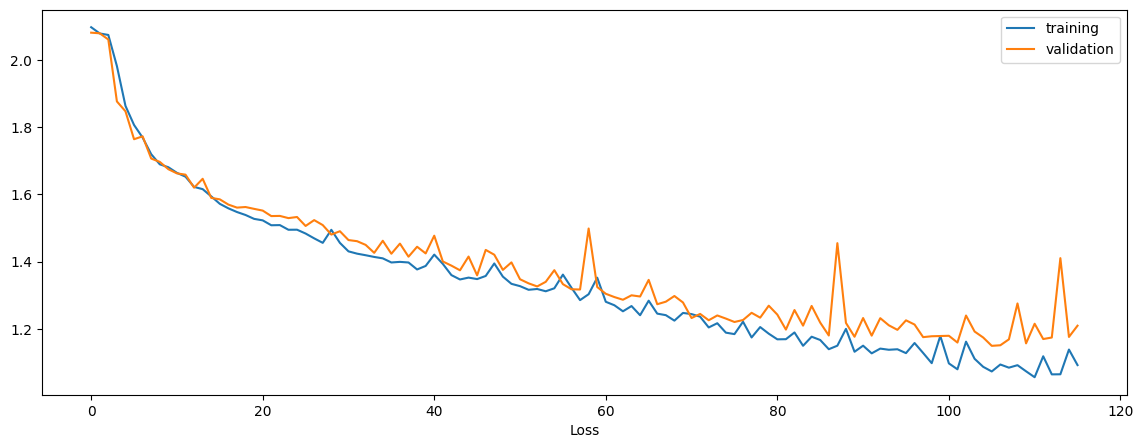

In [6]:
from util import pickleLoad
from visual import plotHistory

history = pickleLoad('source/data/models/{}.pkl'.format(HASH))
plotHistory(history)

In [7]:
props1 = props
model1 = model

In [8]:
props = props.copy()
props['binarize'] = False
props['not_connected'] = False
props['collapse_max'] = True

architecture={
    'activation'    : 'sigmoid',
    'layers'        : [2048,1024,512,256,128],
    'loss'          : 'MSE',
    'learning_rate' : 0.001,
    'batch_size'    : 100000,
    'patience'      : 10,
}

HASH = getHash(name,[architecture,props])
print(HASH)

FNN-Classification-Simple-sigmoid_100000_20481024512256128_0001_MSE_10_1_0_0_1_0_0_None___1_1_0_sourcedata_b25_k5_b25k7_b25k9_b25k11_b25k13_b25_0_1_42_None_08_0_0_05_07


In [9]:
gen = DataGenerator(**props)
train, val, test = gen.getData()

print('train')
print(train[0].shape)
print(train[1].shape)
print('validation')
print(val[0].shape)
print(val[1].shape)
print('test')
print(test[0].shape)
print(test[1].shape)

train
(500856, 566)
(500856, 1)
validation
(73229, 566)
(73229, 1)
test
(63723, 566)
(63723, 1)


In [10]:
stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=architecture['patience'],
)
save = tf.keras.callbacks.ModelCheckpoint(
    filepath='source/data/models/{}.weights.h5'.format(HASH),
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
)

model = buildModel(train[0].shape[1], train[1].shape[1], activation=architecture['activation'], layers=architecture['layers'])

model.compile(loss=locals()[architecture['loss']], optimizer=Adam(learning_rate=architecture['learning_rate']), jit_compile=True, metrics=[STD,MAE])

model.summary()

Model: "FFN"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 input_2 (InputLayer)        [(None, 566)]             0         


 dense_6 (Dense)             (None, 2048)              1161216   


 dense_7 (Dense)             (None, 1024)              2098176   


 dense_8 (Dense)             (None, 512)               524800    


 dense_9 (Dense)             (None, 256)               131328    


 dense_10 (Dense)            (None, 128)               32896     


 dense_11 (Dense)            (None, 1)                 129       


Total params: 3948545 (15.06 MB)


Trainable params: 3948545 (15.06 MB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


In [11]:
if FORCE or not os.path.exists('source/data/models/{}.pkl'.format(HASH)):
    history = model.fit(DataWrapper(train,architecture['batch_size']),
        validation_data=DataWrapper(val,architecture['batch_size'],False),
        epochs=10000,
        verbose=1,
        callbacks = [save,stop],
    )
    pickleSave('source/data/models/{}.pkl'.format(HASH), history.history)

model.load_weights('source/data/models/{}.weights.h5'.format(HASH))

Epoch 1/10000


1/6 [====>.........................] - ETA: 9s - loss: 0.2352 - STD: 2.6664e-05 - MAE: 0.4386

2/6 [=========>....................] - ETA: 1s - loss: 0.2385 - STD: 3.6463e-05 - MAE: 0.4631

3/6 [==============>...............] - ETA: 1s - loss: 0.2363 - STD: 4.7081e-05 - MAE: 0.4676

4/6 [===================>..........] - ETA: 0s - loss: 0.2339 - STD: 5.8869e-05 - MAE: 0.4650

5/6 [========================>.....] - ETA: 0s - loss: 0.2334 - STD: 6.9604e-05 - MAE: 0.4611

6/6 [==============================] - ETA: 0s - loss: 0.2334 - STD: 8.0164e-05 - MAE: 0.4591

6/6 [==============================] - 6s 925ms/step - loss: 0.2334 - STD: 8.0164e-05 - MAE: 0.4591 - val_loss: 0.2316 - val_STD: 1.4307e-04 - val_MAE: 0.4547


Epoch 2/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.2279 - STD: 1.4672e-04 - MAE: 0.4504

2/6 [=========>....................] - ETA: 1s - loss: 0.2269 - STD: 1.5245e-04 - MAE: 0.4549

3/6 [==============>...............] - ETA: 1s - loss: 0.2270 - STD: 1.5617e-04 - MAE: 0.4591

5/6 [========================>.....] - ETA: 0s - loss: 0.2279 - STD: 1.6172e-04 - MAE: 0.4648

6/6 [==============================] - ETA: 0s - loss: 0.2282 - STD: 1.6432e-04 - MAE: 0.4661

6/6 [==============================] - 2s 344ms/step - loss: 0.2282 - STD: 1.6432e-04 - MAE: 0.4661 - val_loss: 0.2295 - val_STD: 1.7785e-04 - val_MAE: 0.4694


Epoch 3/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.2271 - STD: 1.8159e-04 - MAE: 0.4666

2/6 [=========>....................] - ETA: 1s - loss: 0.2266 - STD: 1.8314e-04 - MAE: 0.4635

3/6 [==============>...............] - ETA: 1s - loss: 0.2267 - STD: 1.8466e-04 - MAE: 0.4606

4/6 [===================>..........] - ETA: 0s - loss: 0.2271 - STD: 1.8610e-04 - MAE: 0.4584

6/6 [==============================] - ETA: 0s - loss: 0.2273 - STD: 1.9019e-04 - MAE: 0.4570

6/6 [==============================] - 2s 320ms/step - loss: 0.2273 - STD: 1.9019e-04 - MAE: 0.4570 - val_loss: 0.2295 - val_STD: 2.0636e-04 - val_MAE: 0.4604


Epoch 4/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.2259 - STD: 2.1080e-04 - MAE: 0.4562

2/6 [=========>....................] - ETA: 1s - loss: 0.2262 - STD: 2.1530e-04 - MAE: 0.4587

3/6 [==============>...............] - ETA: 1s - loss: 0.2264 - STD: 2.2006e-04 - MAE: 0.4608

5/6 [========================>.....] - ETA: 0s - loss: 0.2268 - STD: 2.3098e-04 - MAE: 0.4641

6/6 [==============================] - ETA: 0s - loss: 0.2268 - STD: 2.3554e-04 - MAE: 0.4645

6/6 [==============================] - 2s 331ms/step - loss: 0.2268 - STD: 2.3554e-04 - MAE: 0.4645 - val_loss: 0.2291 - val_STD: 2.6207e-04 - val_MAE: 0.4672


Epoch 5/10000


1/6 [====>.........................] - ETA: 0s - loss: 0.2272 - STD: 2.6205e-04 - MAE: 0.4649

2/6 [=========>....................] - ETA: 2s - loss: 0.2264 - STD: 2.7048e-04 - MAE: 0.4632

3/6 [==============>...............] - ETA: 1s - loss: 0.2264 - STD: 2.7749e-04 - MAE: 0.4618

4/6 [===================>..........] - ETA: 0s - loss: 0.2266 - STD: 2.8435e-04 - MAE: 0.4607

5/6 [========================>.....] - ETA: 0s - loss: 0.2265 - STD: 2.9136e-04 - MAE: 0.4596

6/6 [==============================] - ETA: 0s - loss: 0.2266 - STD: 2.9939e-04 - MAE: 0.4590

6/6 [==============================] - 2s 427ms/step - loss: 0.2266 - STD: 2.9939e-04 - MAE: 0.4590 - val_loss: 0.2294 - val_STD: 3.5297e-04 - val_MAE: 0.4605


Epoch 6/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.2265 - STD: 3.6211e-04 - MAE: 0.4570

2/6 [=========>....................] - ETA: 1s - loss: 0.2266 - STD: 3.7355e-04 - MAE: 0.4581

3/6 [==============>...............] - ETA: 1s - loss: 0.2264 - STD: 3.8678e-04 - MAE: 0.4590

4/6 [===================>..........] - ETA: 0s - loss: 0.2264 - STD: 4.0110e-04 - MAE: 0.4600

6/6 [==============================] - ETA: 0s - loss: 0.2265 - STD: 4.3174e-04 - MAE: 0.4618

6/6 [==============================] - 2s 345ms/step - loss: 0.2265 - STD: 4.3174e-04 - MAE: 0.4618 - val_loss: 0.2290 - val_STD: 5.4373e-04 - val_MAE: 0.4675


Epoch 7/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.2265 - STD: 5.5591e-04 - MAE: 0.4645

2/6 [=========>....................] - ETA: 1s - loss: 0.2266 - STD: 5.7958e-04 - MAE: 0.4642

3/6 [==============>...............] - ETA: 1s - loss: 0.2266 - STD: 6.0415e-04 - MAE: 0.4635

5/6 [========================>.....] - ETA: 0s - loss: 0.2266 - STD: 6.4920e-04 - MAE: 0.4598

6/6 [==============================] - ETA: 0s - loss: 0.2266 - STD: 6.7959e-04 - MAE: 0.4587

6/6 [==============================] - 2s 321ms/step - loss: 0.2266 - STD: 6.7959e-04 - MAE: 0.4587 - val_loss: 0.2299 - val_STD: 8.9176e-04 - val_MAE: 0.4577


Epoch 8/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.2270 - STD: 9.1237e-04 - MAE: 0.4543

3/6 [==============>...............] - ETA: 0s - loss: 0.2266 - STD: 0.0010 - MAE: 0.4556    

4/6 [===================>..........] - ETA: 0s - loss: 0.2265 - STD: 0.0011 - MAE: 0.4568

5/6 [========================>.....] - ETA: 0s - loss: 0.2265 - STD: 0.0011 - MAE: 0.4580

6/6 [==============================] - ETA: 0s - loss: 0.2263 - STD: 0.0012 - MAE: 0.4590

6/6 [==============================] - 2s 326ms/step - loss: 0.2263 - STD: 0.0012 - MAE: 0.4590 - val_loss: 0.2286 - val_STD: 0.0017 - val_MAE: 0.4670


Epoch 9/10000


1/6 [====>.........................] - ETA: 0s - loss: 0.2240 - STD: 0.0018 - MAE: 0.4604

2/6 [=========>....................] - ETA: 1s - loss: 0.2265 - STD: 0.0019 - MAE: 0.4621

3/6 [==============>...............] - ETA: 1s - loss: 0.2260 - STD: 0.0020 - MAE: 0.4618

4/6 [===================>..........] - ETA: 0s - loss: 0.2257 - STD: 0.0022 - MAE: 0.4610

5/6 [========================>.....] - ETA: 0s - loss: 0.2257 - STD: 0.0024 - MAE: 0.4603

6/6 [==============================] - ETA: 0s - loss: 0.2257 - STD: 0.0025 - MAE: 0.4596

6/6 [==============================] - 2s 416ms/step - loss: 0.2257 - STD: 0.0025 - MAE: 0.4596 - val_loss: 0.2281 - val_STD: 0.0040 - val_MAE: 0.4591


Epoch 10/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.2254 - STD: 0.0041 - MAE: 0.4557

3/6 [==============>...............] - ETA: 0s - loss: 0.2251 - STD: 0.0049 - MAE: 0.4586

4/6 [===================>..........] - ETA: 0s - loss: 0.2248 - STD: 0.0055 - MAE: 0.4592

5/6 [========================>.....] - ETA: 0s - loss: 0.2246 - STD: 0.0061 - MAE: 0.4595

6/6 [==============================] - ETA: 0s - loss: 0.2243 - STD: 0.0068 - MAE: 0.4594

6/6 [==============================] - 2s 333ms/step - loss: 0.2243 - STD: 0.0068 - MAE: 0.4594 - val_loss: 0.2248 - val_STD: 0.0125 - val_MAE: 0.4587


Epoch 11/10000


1/6 [====>.........................] - ETA: 0s - loss: 0.2260 - STD: 0.0126 - MAE: 0.4588

2/6 [=========>....................] - ETA: 2s - loss: 0.2208 - STD: 0.0143 - MAE: 0.4568

3/6 [==============>...............] - ETA: 1s - loss: 0.2203 - STD: 0.0163 - MAE: 0.4558

4/6 [===================>..........] - ETA: 0s - loss: 0.2197 - STD: 0.0187 - MAE: 0.4547

5/6 [========================>.....] - ETA: 0s - loss: 0.2188 - STD: 0.0217 - MAE: 0.4533

6/6 [==============================] - ETA: 0s - loss: 0.2179 - STD: 0.0253 - MAE: 0.4518

6/6 [==============================] - 2s 451ms/step - loss: 0.2179 - STD: 0.0253 - MAE: 0.4518 - val_loss: 0.2128 - val_STD: 0.0556 - val_MAE: 0.4421


Epoch 12/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.2102 - STD: 0.0569 - MAE: 0.4387

3/6 [==============>...............] - ETA: 0s - loss: 0.2071 - STD: 0.0742 - MAE: 0.4313

4/6 [===================>..........] - ETA: 0s - loss: 0.2052 - STD: 0.0839 - MAE: 0.4272

5/6 [========================>.....] - ETA: 0s - loss: 0.2039 - STD: 0.0941 - MAE: 0.4231

6/6 [==============================] - ETA: 0s - loss: 0.2031 - STD: 0.1045 - MAE: 0.4201

6/6 [==============================] - 2s 329ms/step - loss: 0.2031 - STD: 0.1045 - MAE: 0.4201 - val_loss: 0.2011 - val_STD: 0.1647 - val_MAE: 0.3990


Epoch 13/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1984 - STD: 0.1685 - MAE: 0.3956

2/6 [=========>....................] - ETA: 1s - loss: 0.1976 - STD: 0.1709 - MAE: 0.3932

3/6 [==============>...............] - ETA: 1s - loss: 0.1973 - STD: 0.1725 - MAE: 0.3938

4/6 [===================>..........] - ETA: 0s - loss: 0.1968 - STD: 0.1715 - MAE: 0.3950

5/6 [========================>.....] - ETA: 0s - loss: 0.1963 - STD: 0.1676 - MAE: 0.3966

6/6 [==============================] - 2s 333ms/step - loss: 0.1963 - STD: 0.1636 - MAE: 0.3987 - val_loss: 0.1992 - val_STD: 0.1453 - val_MAE: 0.4146


Epoch 14/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1948 - STD: 0.1491 - MAE: 0.4096

2/6 [=========>....................] - ETA: 1s - loss: 0.1947 - STD: 0.1520 - MAE: 0.4069

4/6 [===================>..........] - ETA: 0s - loss: 0.1955 - STD: 0.1587 - MAE: 0.4007

5/6 [========================>.....] - ETA: 0s - loss: 0.1949 - STD: 0.1649 - MAE: 0.3983

6/6 [==============================] - ETA: 0s - loss: 0.1952 - STD: 0.1701 - MAE: 0.3979

6/6 [==============================] - 2s 321ms/step - loss: 0.1952 - STD: 0.1701 - MAE: 0.3979 - val_loss: 0.1994 - val_STD: 0.1732 - val_MAE: 0.3944


Epoch 15/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1937 - STD: 0.1797 - MAE: 0.3886

3/6 [==============>...............] - ETA: 0s - loss: 0.1946 - STD: 0.1573 - MAE: 0.3893

4/6 [===================>..........] - ETA: 0s - loss: 0.1943 - STD: 0.1602 - MAE: 0.3928

5/6 [========================>.....] - ETA: 0s - loss: 0.1944 - STD: 0.1629 - MAE: 0.3950

6/6 [==============================] - ETA: 0s - loss: 0.1939 - STD: 0.1635 - MAE: 0.3944

6/6 [==============================] - 2s 317ms/step - loss: 0.1939 - STD: 0.1635 - MAE: 0.3944 - val_loss: 0.2025 - val_STD: 0.1567 - val_MAE: 0.3947


Epoch 16/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1945 - STD: 0.1664 - MAE: 0.3861

2/6 [=========>....................] - ETA: 1s - loss: 0.1934 - STD: 0.1773 - MAE: 0.3855

3/6 [==============>...............] - ETA: 1s - loss: 0.1935 - STD: 0.1844 - MAE: 0.3871

4/6 [===================>..........] - ETA: 0s - loss: 0.1933 - STD: 0.1865 - MAE: 0.3877

5/6 [========================>.....] - ETA: 0s - loss: 0.1932 - STD: 0.1846 - MAE: 0.3876

6/6 [==============================] - 2s 334ms/step - loss: 0.1932 - STD: 0.1828 - MAE: 0.3864 - val_loss: 0.1975 - val_STD: 0.1703 - val_MAE: 0.3976


Epoch 17/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1914 - STD: 0.1781 - MAE: 0.3909

2/6 [=========>....................] - ETA: 1s - loss: 0.1918 - STD: 0.1821 - MAE: 0.3923

3/6 [==============>...............] - ETA: 1s - loss: 0.1919 - STD: 0.1833 - MAE: 0.3918

4/6 [===================>..........] - ETA: 0s - loss: 0.1917 - STD: 0.1820 - MAE: 0.3901

5/6 [========================>.....] - ETA: 0s - loss: 0.1919 - STD: 0.1806 - MAE: 0.3894

6/6 [==============================] - 2s 344ms/step - loss: 0.1919 - STD: 0.1800 - MAE: 0.3897 - val_loss: 0.1966 - val_STD: 0.1723 - val_MAE: 0.4024


Epoch 18/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1923 - STD: 0.1786 - MAE: 0.3974

2/6 [=========>....................] - ETA: 1s - loss: 0.1919 - STD: 0.1744 - MAE: 0.3964

3/6 [==============>...............] - ETA: 1s - loss: 0.1917 - STD: 0.1709 - MAE: 0.3945

4/6 [===================>..........] - ETA: 0s - loss: 0.1915 - STD: 0.1718 - MAE: 0.3931

5/6 [========================>.....] - ETA: 0s - loss: 0.1915 - STD: 0.1754 - MAE: 0.3923

6/6 [==============================] - 2s 316ms/step - loss: 0.1915 - STD: 0.1775 - MAE: 0.3917 - val_loss: 0.1975 - val_STD: 0.1805 - val_MAE: 0.3903


Epoch 19/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1913 - STD: 0.1877 - MAE: 0.3840

2/6 [=========>....................] - ETA: 1s - loss: 0.1913 - STD: 0.1837 - MAE: 0.3843

3/6 [==============>...............] - ETA: 1s - loss: 0.1909 - STD: 0.1821 - MAE: 0.3858

4/6 [===================>..........] - ETA: 0s - loss: 0.1909 - STD: 0.1818 - MAE: 0.3877

5/6 [========================>.....] - ETA: 0s - loss: 0.1908 - STD: 0.1811 - MAE: 0.3884

6/6 [==============================] - 2s 332ms/step - loss: 0.1908 - STD: 0.1809 - MAE: 0.3882 - val_loss: 0.1960 - val_STD: 0.1842 - val_MAE: 0.3930


Epoch 20/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1896 - STD: 0.1908 - MAE: 0.3863

2/6 [=========>....................] - ETA: 1s - loss: 0.1903 - STD: 0.1933 - MAE: 0.3861

3/6 [==============>...............] - ETA: 1s - loss: 0.1902 - STD: 0.1932 - MAE: 0.3846

4/6 [===================>..........] - ETA: 0s - loss: 0.1904 - STD: 0.1907 - MAE: 0.3840

6/6 [==============================] - ETA: 0s - loss: 0.1905 - STD: 0.1854 - MAE: 0.3858

6/6 [==============================] - 2s 344ms/step - loss: 0.1905 - STD: 0.1854 - MAE: 0.3858 - val_loss: 0.1957 - val_STD: 0.1671 - val_MAE: 0.3975


Epoch 21/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1899 - STD: 0.1749 - MAE: 0.3911

2/6 [=========>....................] - ETA: 1s - loss: 0.1903 - STD: 0.1781 - MAE: 0.3914

3/6 [==============>...............] - ETA: 1s - loss: 0.1902 - STD: 0.1806 - MAE: 0.3900

4/6 [===================>..........] - ETA: 0s - loss: 0.1900 - STD: 0.1828 - MAE: 0.3878

5/6 [========================>.....] - ETA: 0s - loss: 0.1898 - STD: 0.1845 - MAE: 0.3862

6/6 [==============================] - 2s 328ms/step - loss: 0.1898 - STD: 0.1847 - MAE: 0.3850 - val_loss: 0.1959 - val_STD: 0.1768 - val_MAE: 0.3915


Epoch 22/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1899 - STD: 0.1832 - MAE: 0.3851

2/6 [=========>....................] - ETA: 1s - loss: 0.1899 - STD: 0.1796 - MAE: 0.3863

3/6 [==============>...............] - ETA: 1s - loss: 0.1898 - STD: 0.1790 - MAE: 0.3878

5/6 [========================>.....] - ETA: 0s - loss: 0.1895 - STD: 0.1821 - MAE: 0.3862

6/6 [==============================] - ETA: 0s - loss: 0.1894 - STD: 0.1852 - MAE: 0.3844

6/6 [==============================] - 2s 332ms/step - loss: 0.1894 - STD: 0.1852 - MAE: 0.3844 - val_loss: 0.1961 - val_STD: 0.1959 - val_MAE: 0.3843


Epoch 23/10000


1/6 [====>.........................] - ETA: 0s - loss: 0.1893 - STD: 0.2072 - MAE: 0.3743

2/6 [=========>....................] - ETA: 1s - loss: 0.1897 - STD: 0.1951 - MAE: 0.3784

3/6 [==============>...............] - ETA: 1s - loss: 0.1896 - STD: 0.1883 - MAE: 0.3827

4/6 [===================>..........] - ETA: 0s - loss: 0.1897 - STD: 0.1846 - MAE: 0.3859

5/6 [========================>.....] - ETA: 0s - loss: 0.1893 - STD: 0.1830 - MAE: 0.3865

6/6 [==============================] - ETA: 0s - loss: 0.1892 - STD: 0.1835 - MAE: 0.3855

6/6 [==============================] - 2s 418ms/step - loss: 0.1892 - STD: 0.1835 - MAE: 0.3855 - val_loss: 0.1956 - val_STD: 0.1954 - val_MAE: 0.3847


Epoch 24/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1881 - STD: 0.2003 - MAE: 0.3764

2/6 [=========>....................] - ETA: 1s - loss: 0.1886 - STD: 0.2031 - MAE: 0.3766

3/6 [==============>...............] - ETA: 1s - loss: 0.1886 - STD: 0.2007 - MAE: 0.3778

4/6 [===================>..........] - ETA: 0s - loss: 0.1886 - STD: 0.1954 - MAE: 0.3797

5/6 [========================>.....] - ETA: 0s - loss: 0.1886 - STD: 0.1913 - MAE: 0.3819

6/6 [==============================] - 2s 344ms/step - loss: 0.1886 - STD: 0.1887 - MAE: 0.3843 - val_loss: 0.1943 - val_STD: 0.1826 - val_MAE: 0.3942


Epoch 25/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1891 - STD: 0.1881 - MAE: 0.3878

2/6 [=========>....................] - ETA: 1s - loss: 0.1890 - STD: 0.1872 - MAE: 0.3846

3/6 [==============>...............] - ETA: 1s - loss: 0.1884 - STD: 0.1883 - MAE: 0.3819

5/6 [========================>.....] - ETA: 0s - loss: 0.1882 - STD: 0.1926 - MAE: 0.3813

6/6 [==============================] - ETA: 0s - loss: 0.1881 - STD: 0.1911 - MAE: 0.3815

6/6 [==============================] - 2s 327ms/step - loss: 0.1881 - STD: 0.1911 - MAE: 0.3815 - val_loss: 0.1943 - val_STD: 0.1803 - val_MAE: 0.3940


Epoch 26/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1877 - STD: 0.1868 - MAE: 0.3862

2/6 [=========>....................] - ETA: 1s - loss: 0.1874 - STD: 0.1852 - MAE: 0.3862

3/6 [==============>...............] - ETA: 1s - loss: 0.1876 - STD: 0.1835 - MAE: 0.3858

4/6 [===================>..........] - ETA: 0s - loss: 0.1876 - STD: 0.1851 - MAE: 0.3848

5/6 [========================>.....] - ETA: 0s - loss: 0.1875 - STD: 0.1875 - MAE: 0.3837

6/6 [==============================] - 2s 330ms/step - loss: 0.1875 - STD: 0.1884 - MAE: 0.3837 - val_loss: 0.1965 - val_STD: 0.2042 - val_MAE: 0.3920


Epoch 27/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1907 - STD: 0.2099 - MAE: 0.3846

2/6 [=========>....................] - ETA: 1s - loss: 0.1886 - STD: 0.1968 - MAE: 0.3833

3/6 [==============>...............] - ETA: 1s - loss: 0.1890 - STD: 0.1848 - MAE: 0.3840

5/6 [========================>.....] - ETA: 0s - loss: 0.1896 - STD: 0.1951 - MAE: 0.3827

6/6 [==============================] - ETA: 0s - loss: 0.1893 - STD: 0.1930 - MAE: 0.3820

6/6 [==============================] - 2s 325ms/step - loss: 0.1893 - STD: 0.1930 - MAE: 0.3820 - val_loss: 0.1981 - val_STD: 0.1623 - val_MAE: 0.3897


Epoch 28/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1905 - STD: 0.1708 - MAE: 0.3804

2/6 [=========>....................] - ETA: 1s - loss: 0.1890 - STD: 0.1873 - MAE: 0.3807

3/6 [==============>...............] - ETA: 1s - loss: 0.1888 - STD: 0.1925 - MAE: 0.3816

4/6 [===================>..........] - ETA: 0s - loss: 0.1885 - STD: 0.1886 - MAE: 0.3820

5/6 [========================>.....] - ETA: 0s - loss: 0.1884 - STD: 0.1850 - MAE: 0.3823

6/6 [==============================] - 2s 315ms/step - loss: 0.1884 - STD: 0.1870 - MAE: 0.3816 - val_loss: 0.1973 - val_STD: 0.2085 - val_MAE: 0.3920


Epoch 29/10000


1/6 [====>.........................] - ETA: 0s - loss: 0.1847 - STD: 0.2140 - MAE: 0.3781

2/6 [=========>....................] - ETA: 1s - loss: 0.1864 - STD: 0.2122 - MAE: 0.3756

3/6 [==============>...............] - ETA: 1s - loss: 0.1887 - STD: 0.2011 - MAE: 0.3750

4/6 [===================>..........] - ETA: 0s - loss: 0.1883 - STD: 0.1986 - MAE: 0.3747

5/6 [========================>.....] - ETA: 0s - loss: 0.1886 - STD: 0.2008 - MAE: 0.3761

6/6 [==============================] - ETA: 0s - loss: 0.1885 - STD: 0.2003 - MAE: 0.3777

6/6 [==============================] - 2s 410ms/step - loss: 0.1885 - STD: 0.2003 - MAE: 0.3777 - val_loss: 0.1952 - val_STD: 0.1565 - val_MAE: 0.3971


Epoch 30/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1881 - STD: 0.1638 - MAE: 0.3884

2/6 [=========>....................] - ETA: 1s - loss: 0.1878 - STD: 0.1630 - MAE: 0.3881

3/6 [==============>...............] - ETA: 1s - loss: 0.1877 - STD: 0.1730 - MAE: 0.3870

4/6 [===================>..........] - ETA: 0s - loss: 0.1878 - STD: 0.1815 - MAE: 0.3856

6/6 [==============================] - ETA: 0s - loss: 0.1882 - STD: 0.1833 - MAE: 0.3840

6/6 [==============================] - 2s 330ms/step - loss: 0.1882 - STD: 0.1833 - MAE: 0.3840 - val_loss: 0.1938 - val_STD: 0.1802 - val_MAE: 0.3892


Epoch 31/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1859 - STD: 0.1866 - MAE: 0.3798

3/6 [==============>...............] - ETA: 0s - loss: 0.1864 - STD: 0.1963 - MAE: 0.3816

4/6 [===================>..........] - ETA: 0s - loss: 0.1863 - STD: 0.1926 - MAE: 0.3809

5/6 [========================>.....] - ETA: 0s - loss: 0.1866 - STD: 0.1907 - MAE: 0.3804

6/6 [==============================] - ETA: 0s - loss: 0.1866 - STD: 0.1924 - MAE: 0.3799

6/6 [==============================] - 2s 321ms/step - loss: 0.1866 - STD: 0.1924 - MAE: 0.3799 - val_loss: 0.1940 - val_STD: 0.1998 - val_MAE: 0.3883


Epoch 32/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1869 - STD: 0.2048 - MAE: 0.3795

2/6 [=========>....................] - ETA: 1s - loss: 0.1864 - STD: 0.1988 - MAE: 0.3794

3/6 [==============>...............] - ETA: 1s - loss: 0.1864 - STD: 0.1919 - MAE: 0.3797

5/6 [========================>.....] - ETA: 0s - loss: 0.1873 - STD: 0.1904 - MAE: 0.3839

6/6 [==============================] - ETA: 0s - loss: 0.1874 - STD: 0.1911 - MAE: 0.3843

6/6 [==============================] - 2s 317ms/step - loss: 0.1874 - STD: 0.1911 - MAE: 0.3843 - val_loss: 0.1949 - val_STD: 0.1649 - val_MAE: 0.3923


Epoch 33/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1878 - STD: 0.1724 - MAE: 0.3835

2/6 [=========>....................] - ETA: 1s - loss: 0.1878 - STD: 0.1733 - MAE: 0.3820

4/6 [===================>..........] - ETA: 0s - loss: 0.1870 - STD: 0.1902 - MAE: 0.3762

5/6 [========================>.....] - ETA: 0s - loss: 0.1866 - STD: 0.1921 - MAE: 0.3754

6/6 [==============================] - ETA: 0s - loss: 0.1867 - STD: 0.1925 - MAE: 0.3753

6/6 [==============================] - 2s 332ms/step - loss: 0.1867 - STD: 0.1925 - MAE: 0.3753 - val_loss: 0.1931 - val_STD: 0.1903 - val_MAE: 0.3871


Epoch 34/10000


1/6 [====>.........................] - ETA: 0s - loss: 0.1841 - STD: 0.1810 - MAE: 0.3778

2/6 [=========>....................] - ETA: 1s - loss: 0.1862 - STD: 0.1911 - MAE: 0.3786

3/6 [==============>...............] - ETA: 1s - loss: 0.1858 - STD: 0.1917 - MAE: 0.3789

4/6 [===================>..........] - ETA: 0s - loss: 0.1860 - STD: 0.1898 - MAE: 0.3793

5/6 [========================>.....] - ETA: 0s - loss: 0.1859 - STD: 0.1895 - MAE: 0.3794

6/6 [==============================] - ETA: 0s - loss: 0.1858 - STD: 0.1909 - MAE: 0.3793

6/6 [==============================] - 2s 432ms/step - loss: 0.1858 - STD: 0.1909 - MAE: 0.3793 - val_loss: 0.1929 - val_STD: 0.1918 - val_MAE: 0.3873


Epoch 35/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1851 - STD: 0.1979 - MAE: 0.3776

3/6 [==============>...............] - ETA: 0s - loss: 0.1857 - STD: 0.1846 - MAE: 0.3860

4/6 [===================>..........] - ETA: 0s - loss: 0.1859 - STD: 0.1847 - MAE: 0.3859

5/6 [========================>.....] - ETA: 0s - loss: 0.1859 - STD: 0.1864 - MAE: 0.3856

6/6 [==============================] - ETA: 0s - loss: 0.1858 - STD: 0.1871 - MAE: 0.3847

6/6 [==============================] - 2s 317ms/step - loss: 0.1858 - STD: 0.1871 - MAE: 0.3847 - val_loss: 0.1934 - val_STD: 0.1828 - val_MAE: 0.3859


Epoch 36/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1862 - STD: 0.1897 - MAE: 0.3769

2/6 [=========>....................] - ETA: 1s - loss: 0.1854 - STD: 0.1951 - MAE: 0.3745

3/6 [==============>...............] - ETA: 1s - loss: 0.1856 - STD: 0.1997 - MAE: 0.3740

4/6 [===================>..........] - ETA: 0s - loss: 0.1855 - STD: 0.2004 - MAE: 0.3742

5/6 [========================>.....] - ETA: 0s - loss: 0.1855 - STD: 0.1980 - MAE: 0.3750

6/6 [==============================] - 2s 329ms/step - loss: 0.1855 - STD: 0.1965 - MAE: 0.3767 - val_loss: 0.1928 - val_STD: 0.1636 - val_MAE: 0.3979


Epoch 37/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1863 - STD: 0.1703 - MAE: 0.3894

3/6 [==============>...............] - ETA: 0s - loss: 0.1858 - STD: 0.1809 - MAE: 0.3860

4/6 [===================>..........] - ETA: 0s - loss: 0.1857 - STD: 0.1865 - MAE: 0.3825

5/6 [========================>.....] - ETA: 0s - loss: 0.1856 - STD: 0.1915 - MAE: 0.3792

6/6 [==============================] - ETA: 0s - loss: 0.1857 - STD: 0.1952 - MAE: 0.3771

6/6 [==============================] - 2s 321ms/step - loss: 0.1857 - STD: 0.1952 - MAE: 0.3771 - val_loss: 0.1931 - val_STD: 0.1977 - val_MAE: 0.3817


Epoch 38/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1852 - STD: 0.2042 - MAE: 0.3716

2/6 [=========>....................] - ETA: 1s - loss: 0.1847 - STD: 0.1982 - MAE: 0.3749

3/6 [==============>...............] - ETA: 1s - loss: 0.1849 - STD: 0.1932 - MAE: 0.3783

4/6 [===================>..........] - ETA: 0s - loss: 0.1852 - STD: 0.1907 - MAE: 0.3803

6/6 [==============================] - ETA: 0s - loss: 0.1851 - STD: 0.1901 - MAE: 0.3810

6/6 [==============================] - 2s 317ms/step - loss: 0.1851 - STD: 0.1901 - MAE: 0.3810 - val_loss: 0.1929 - val_STD: 0.1985 - val_MAE: 0.3815


Epoch 39/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1855 - STD: 0.2055 - MAE: 0.3719

2/6 [=========>....................] - ETA: 1s - loss: 0.1853 - STD: 0.2060 - MAE: 0.3709

3/6 [==============>...............] - ETA: 1s - loss: 0.1849 - STD: 0.2053 - MAE: 0.3709

5/6 [========================>.....] - ETA: 0s - loss: 0.1849 - STD: 0.2010 - MAE: 0.3755

6/6 [==============================] - ETA: 0s - loss: 0.1851 - STD: 0.1973 - MAE: 0.3775

6/6 [==============================] - 2s 334ms/step - loss: 0.1851 - STD: 0.1973 - MAE: 0.3775 - val_loss: 0.1917 - val_STD: 0.1800 - val_MAE: 0.3930


Epoch 40/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1852 - STD: 0.1856 - MAE: 0.3845

2/6 [=========>....................] - ETA: 1s - loss: 0.1848 - STD: 0.1913 - MAE: 0.3807

3/6 [==============>...............] - ETA: 1s - loss: 0.1851 - STD: 0.1958 - MAE: 0.3777

5/6 [========================>.....] - ETA: 0s - loss: 0.1854 - STD: 0.1952 - MAE: 0.3768

6/6 [==============================] - ETA: 0s - loss: 0.1852 - STD: 0.1967 - MAE: 0.3763

6/6 [==============================] - 2s 320ms/step - loss: 0.1852 - STD: 0.1967 - MAE: 0.3763 - val_loss: 0.1922 - val_STD: 0.1959 - val_MAE: 0.3890


Epoch 41/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1852 - STD: 0.2018 - MAE: 0.3796

2/6 [=========>....................] - ETA: 1s - loss: 0.1856 - STD: 0.1923 - MAE: 0.3815

4/6 [===================>..........] - ETA: 0s - loss: 0.1853 - STD: 0.1932 - MAE: 0.3778

5/6 [========================>.....] - ETA: 0s - loss: 0.1853 - STD: 0.1972 - MAE: 0.3763

6/6 [==============================] - ETA: 0s - loss: 0.1853 - STD: 0.1971 - MAE: 0.3751

6/6 [==============================] - 2s 317ms/step - loss: 0.1853 - STD: 0.1971 - MAE: 0.3751 - val_loss: 0.1927 - val_STD: 0.1968 - val_MAE: 0.3808


Epoch 42/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1845 - STD: 0.2030 - MAE: 0.3704

2/6 [=========>....................] - ETA: 1s - loss: 0.1846 - STD: 0.2055 - MAE: 0.3724

3/6 [==============>...............] - ETA: 1s - loss: 0.1848 - STD: 0.2022 - MAE: 0.3748

4/6 [===================>..........] - ETA: 0s - loss: 0.1849 - STD: 0.1965 - MAE: 0.3767

5/6 [========================>.....] - ETA: 0s - loss: 0.1848 - STD: 0.1950 - MAE: 0.3776

6/6 [==============================] - 2s 329ms/step - loss: 0.1848 - STD: 0.1958 - MAE: 0.3770 - val_loss: 0.1915 - val_STD: 0.1879 - val_MAE: 0.3865


Epoch 43/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1840 - STD: 0.1959 - MAE: 0.3762

2/6 [=========>....................] - ETA: 1s - loss: 0.1845 - STD: 0.1935 - MAE: 0.3763

4/6 [===================>..........] - ETA: 0s - loss: 0.1853 - STD: 0.2028 - MAE: 0.3749

5/6 [========================>.....] - ETA: 0s - loss: 0.1850 - STD: 0.2020 - MAE: 0.3744

6/6 [==============================] - ETA: 0s - loss: 0.1853 - STD: 0.1990 - MAE: 0.3747

6/6 [==============================] - 2s 329ms/step - loss: 0.1853 - STD: 0.1990 - MAE: 0.3747 - val_loss: 0.1912 - val_STD: 0.1959 - val_MAE: 0.3861


Epoch 44/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1849 - STD: 0.2013 - MAE: 0.3777

2/6 [=========>....................] - ETA: 1s - loss: 0.1853 - STD: 0.2037 - MAE: 0.3786

3/6 [==============>...............] - ETA: 0s - loss: 0.1850 - STD: 0.1995 - MAE: 0.3781

4/6 [===================>..........] - ETA: 0s - loss: 0.1851 - STD: 0.1967 - MAE: 0.3777

6/6 [==============================] - ETA: 0s - loss: 0.1849 - STD: 0.2012 - MAE: 0.3755

6/6 [==============================] - 2s 328ms/step - loss: 0.1849 - STD: 0.2012 - MAE: 0.3755 - val_loss: 0.1918 - val_STD: 0.1905 - val_MAE: 0.3826


Epoch 45/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1834 - STD: 0.1970 - MAE: 0.3716

2/6 [=========>....................] - ETA: 1s - loss: 0.1839 - STD: 0.1953 - MAE: 0.3723

3/6 [==============>...............] - ETA: 1s - loss: 0.1841 - STD: 0.1982 - MAE: 0.3734

5/6 [========================>.....] - ETA: 0s - loss: 0.1847 - STD: 0.1993 - MAE: 0.3770

6/6 [==============================] - ETA: 0s - loss: 0.1845 - STD: 0.1975 - MAE: 0.3774

6/6 [==============================] - 2s 319ms/step - loss: 0.1845 - STD: 0.1975 - MAE: 0.3774 - val_loss: 0.1923 - val_STD: 0.1783 - val_MAE: 0.3878


Epoch 46/10000


1/6 [====>.........................] - ETA: 0s - loss: 0.1937 - STD: 0.1953 - MAE: 0.3850

2/6 [=========>....................] - ETA: 2s - loss: 0.1847 - STD: 0.1967 - MAE: 0.3826

3/6 [==============>...............] - ETA: 1s - loss: 0.1842 - STD: 0.1983 - MAE: 0.3810

4/6 [===================>..........] - ETA: 0s - loss: 0.1844 - STD: 0.1964 - MAE: 0.3797

5/6 [========================>.....] - ETA: 0s - loss: 0.1843 - STD: 0.1968 - MAE: 0.3782

6/6 [==============================] - ETA: 0s - loss: 0.1845 - STD: 0.1997 - MAE: 0.3771

6/6 [==============================] - 2s 425ms/step - loss: 0.1845 - STD: 0.1997 - MAE: 0.3771 - val_loss: 0.1914 - val_STD: 0.2037 - val_MAE: 0.3814


Epoch 47/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1844 - STD: 0.2107 - MAE: 0.3719

2/6 [=========>....................] - ETA: 1s - loss: 0.1842 - STD: 0.2027 - MAE: 0.3730

3/6 [==============>...............] - ETA: 1s - loss: 0.1842 - STD: 0.1989 - MAE: 0.3746

5/6 [========================>.....] - ETA: 0s - loss: 0.1841 - STD: 0.2016 - MAE: 0.3731

6/6 [==============================] - ETA: 0s - loss: 0.1840 - STD: 0.2019 - MAE: 0.3724

6/6 [==============================] - 2s 320ms/step - loss: 0.1840 - STD: 0.2019 - MAE: 0.3724 - val_loss: 0.1916 - val_STD: 0.2012 - val_MAE: 0.3786


Epoch 48/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1841 - STD: 0.2077 - MAE: 0.3690

3/6 [==============>...............] - ETA: 0s - loss: 0.1837 - STD: 0.2137 - MAE: 0.3670

4/6 [===================>..........] - ETA: 0s - loss: 0.1840 - STD: 0.2090 - MAE: 0.3690

5/6 [========================>.....] - ETA: 0s - loss: 0.1839 - STD: 0.2059 - MAE: 0.3704

6/6 [==============================] - ETA: 0s - loss: 0.1839 - STD: 0.2052 - MAE: 0.3714

6/6 [==============================] - 2s 329ms/step - loss: 0.1839 - STD: 0.2052 - MAE: 0.3714 - val_loss: 0.1908 - val_STD: 0.1948 - val_MAE: 0.3847


Epoch 49/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1833 - STD: 0.2023 - MAE: 0.3746

2/6 [=========>....................] - ETA: 1s - loss: 0.1837 - STD: 0.2006 - MAE: 0.3737

3/6 [==============>...............] - ETA: 0s - loss: 0.1837 - STD: 0.2011 - MAE: 0.3732

4/6 [===================>..........] - ETA: 0s - loss: 0.1837 - STD: 0.2028 - MAE: 0.3730

5/6 [========================>.....] - ETA: 0s - loss: 0.1836 - STD: 0.2025 - MAE: 0.3731

6/6 [==============================] - 2s 316ms/step - loss: 0.1836 - STD: 0.2035 - MAE: 0.3712 - val_loss: 0.1911 - val_STD: 0.2024 - val_MAE: 0.3824


Epoch 50/10000


1/6 [====>.........................] - ETA: 0s - loss: 0.1809 - STD: 0.2180 - MAE: 0.3677

2/6 [=========>....................] - ETA: 2s - loss: 0.1844 - STD: 0.2058 - MAE: 0.3691

3/6 [==============>...............] - ETA: 1s - loss: 0.1837 - STD: 0.2038 - MAE: 0.3701

4/6 [===================>..........] - ETA: 0s - loss: 0.1838 - STD: 0.2054 - MAE: 0.3714

5/6 [========================>.....] - ETA: 0s - loss: 0.1838 - STD: 0.2044 - MAE: 0.3720

6/6 [==============================] - ETA: 0s - loss: 0.1840 - STD: 0.2024 - MAE: 0.3724

6/6 [==============================] - 2s 439ms/step - loss: 0.1840 - STD: 0.2024 - MAE: 0.3724 - val_loss: 0.1904 - val_STD: 0.1961 - val_MAE: 0.3844


Epoch 51/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1836 - STD: 0.2024 - MAE: 0.3754

2/6 [=========>....................] - ETA: 1s - loss: 0.1836 - STD: 0.2053 - MAE: 0.3751

3/6 [==============>...............] - ETA: 1s - loss: 0.1837 - STD: 0.2035 - MAE: 0.3739

5/6 [========================>.....] - ETA: 0s - loss: 0.1839 - STD: 0.2017 - MAE: 0.3760

6/6 [==============================] - ETA: 0s - loss: 0.1838 - STD: 0.2001 - MAE: 0.3767

6/6 [==============================] - 2s 322ms/step - loss: 0.1838 - STD: 0.2001 - MAE: 0.3767 - val_loss: 0.1921 - val_STD: 0.1801 - val_MAE: 0.3842


Epoch 52/10000


1/6 [====>.........................] - ETA: 2s - loss: 0.1839 - STD: 0.1894 - MAE: 0.3735

2/6 [=========>....................] - ETA: 1s - loss: 0.1834 - STD: 0.1990 - MAE: 0.3715

3/6 [==============>...............] - ETA: 1s - loss: 0.1838 - STD: 0.2063 - MAE: 0.3708

4/6 [===================>..........] - ETA: 0s - loss: 0.1837 - STD: 0.2054 - MAE: 0.3703

6/6 [==============================] - ETA: 0s - loss: 0.1842 - STD: 0.2005 - MAE: 0.3764

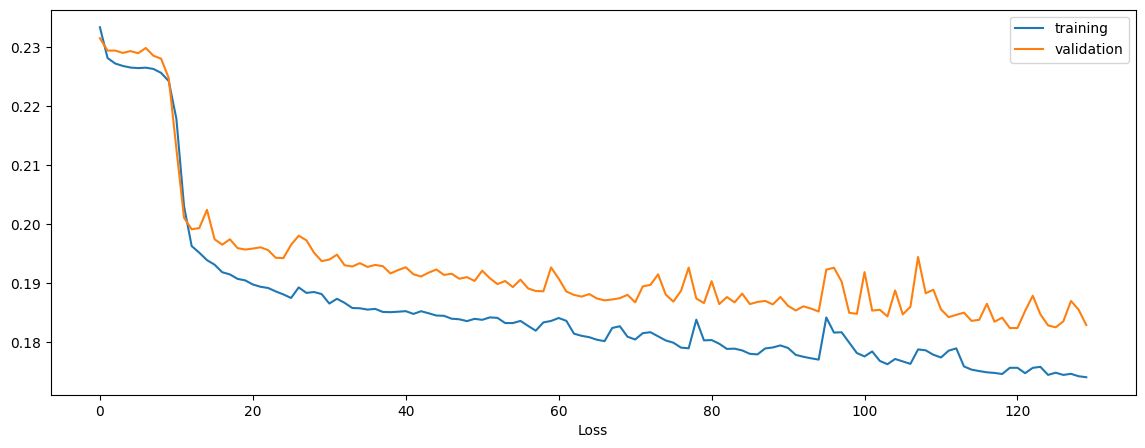

In [12]:
history = pickleLoad('source/data/models/{}.pkl'.format(HASH))
plotHistory(history)

In [13]:
props2 = props
model2 = model

In [14]:
def getTrue(threshold):
    props=props1.copy()
    props['threshold'] = threshold
    props['radiomics'] = []
    props['radiomics_vox'] = ['k5_b25']
    props['balance_data'] = False
    gen = DataGenerator(**props)
    return gen

def getPred(threshold, cla, reg):
    reg = reg[:,0]
    pred = cla.copy()
    pred[:,-1] = np.where(reg < threshold, 1, 0)
    for i in range(cla.shape[-1]-1):
        pred[:,i] = np.where(reg < threshold, 0, pred[:,i])
    return pred

In [15]:
from util import getAccuarcy, predictInBatches

props1['balance_data'] = False
props2['balance_data'] = False
gen1 = DataGenerator(**props1)
gen2 = DataGenerator(**props2)
train1, val1, test1 = gen1.getData()
train2, val2, test2 = gen2.getData()

train_cla = predictInBatches(model1,train1[0],architecture['batch_size'])
val_cla = predictInBatches(model1,val1[0],architecture['batch_size'])
test_cla = predictInBatches(model1,test1[0],architecture['batch_size'])
train_reg = predictInBatches(model2,train2[0],architecture['batch_size'])
val_reg = predictInBatches(model2,val2[0],architecture['batch_size'])
test_reg = predictInBatches(model2,test2[0],architecture['batch_size'])

threshold = props['threshold']

gen = getTrue(threshold)
train_true, val_true, test_true = gen.getData()
train_pred = getPred(threshold, train_cla, train_reg)
val_pred = getPred(threshold, val_cla, val_reg)
test_pred = getPred(threshold, test_cla, test_reg)

print(getAccuarcy(train_true[1],train_pred))
print(getAccuarcy(val_true[1],val_pred))
print(getAccuarcy(test_true[1],test_pred))

0.6536564260733613
0.6516353387730982
0.5664601485942784


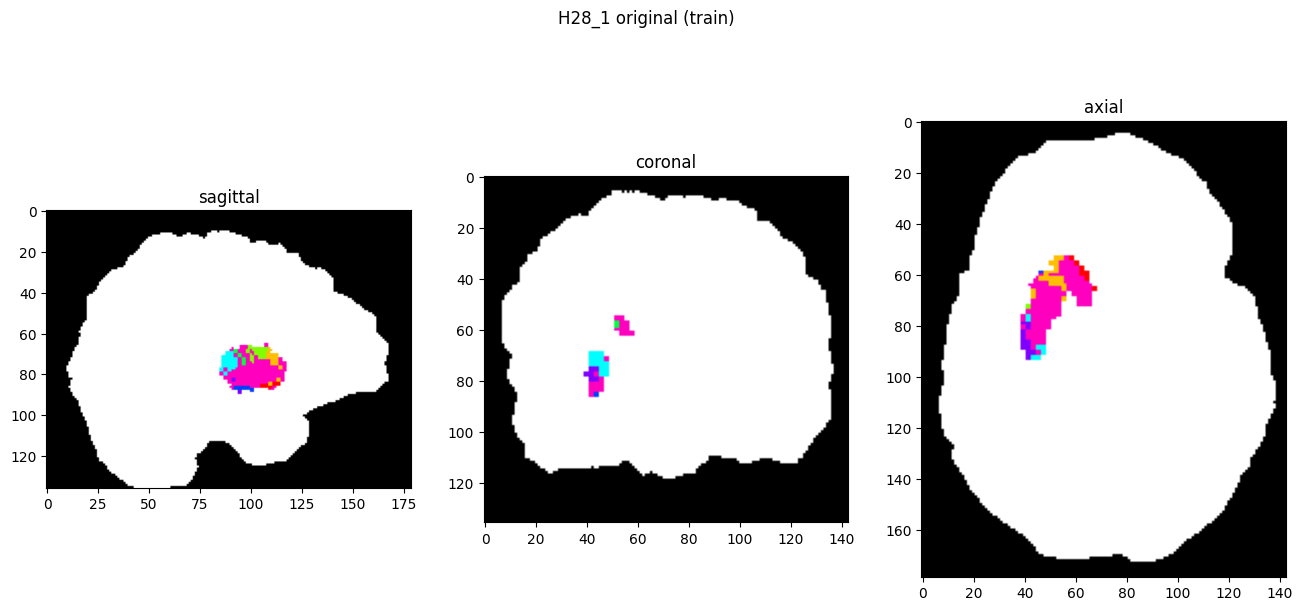

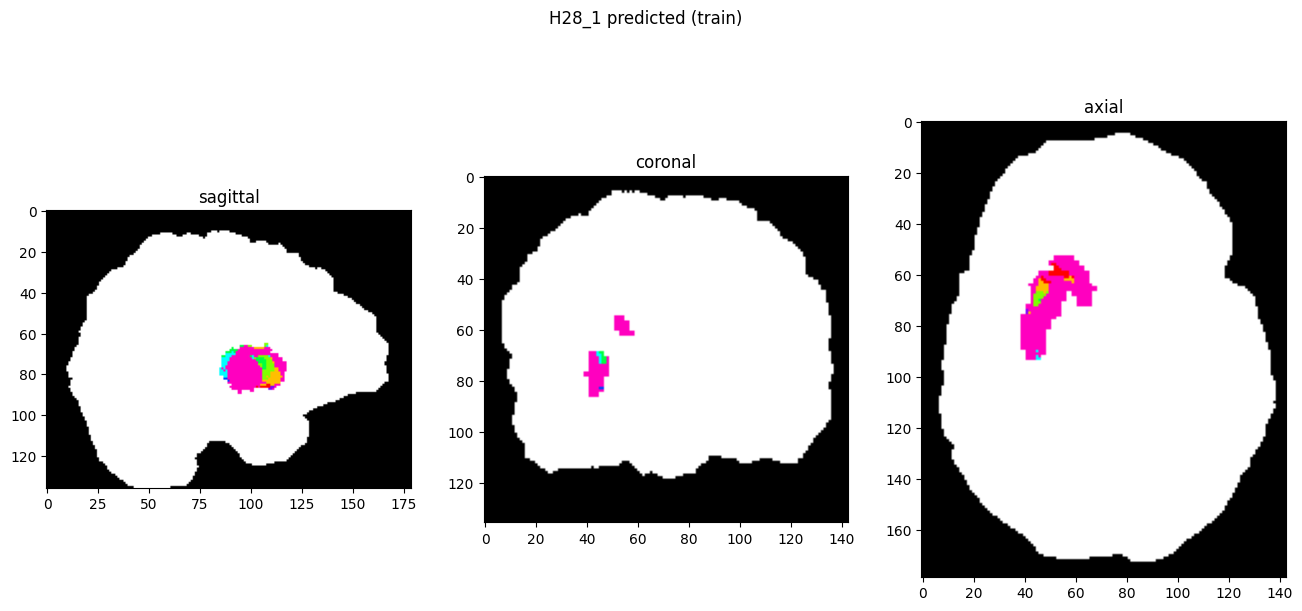

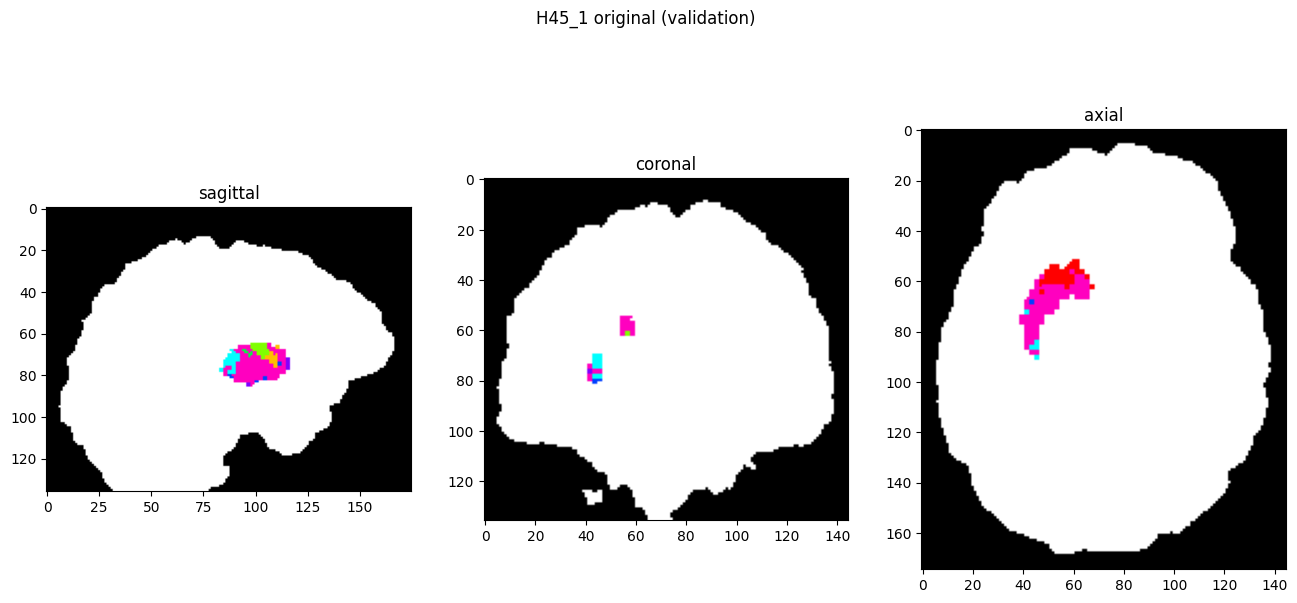

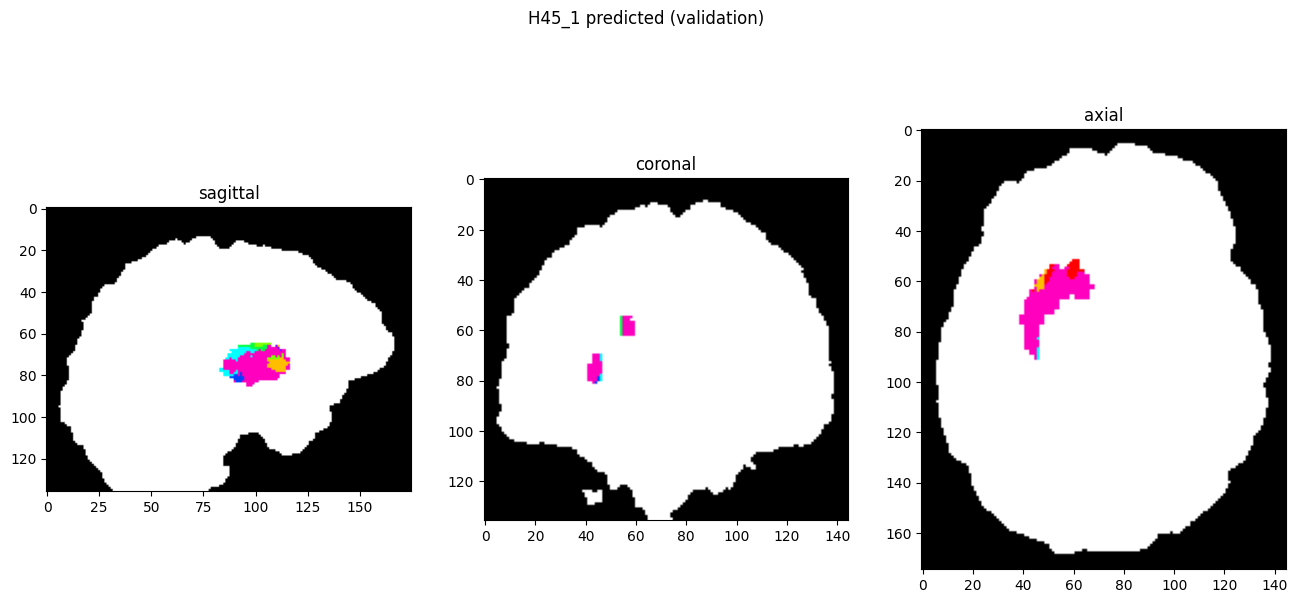

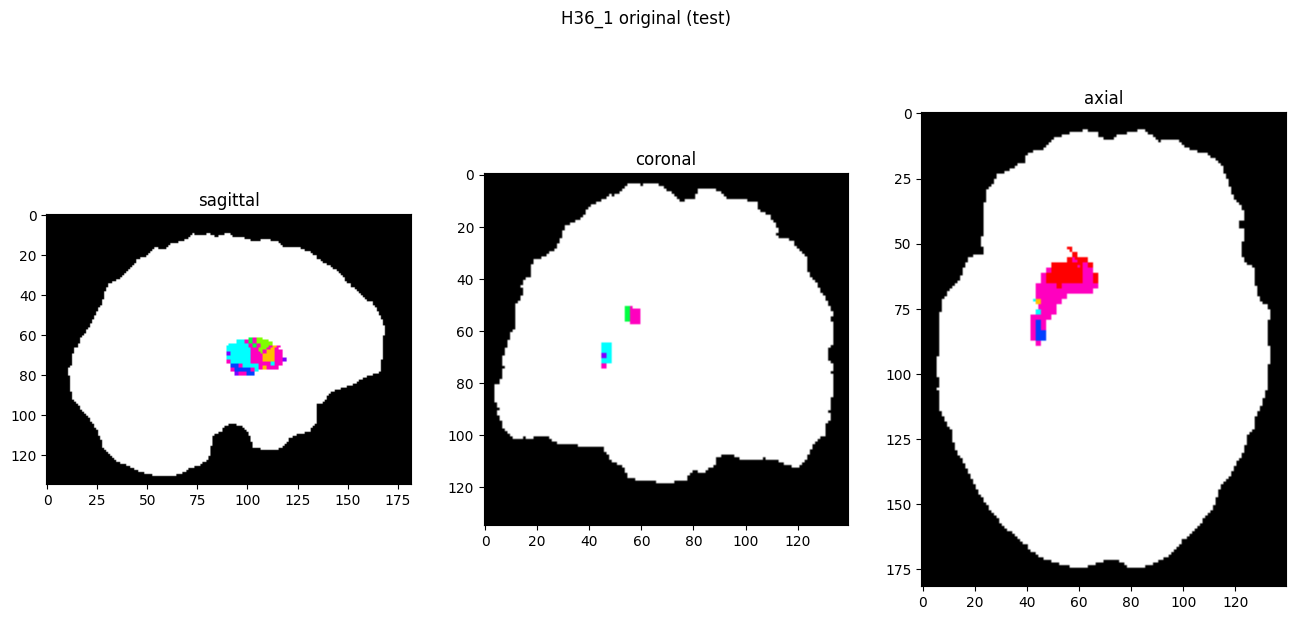

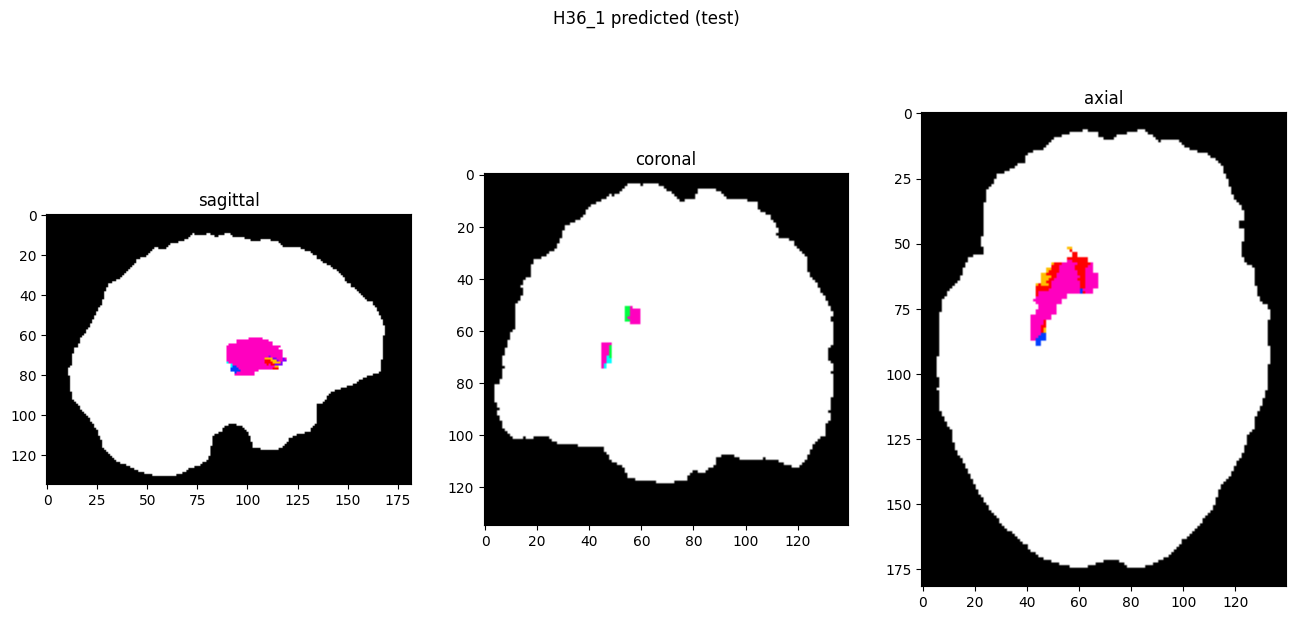

In [16]:
def customPredict(mode):
    idx = {'train':0,'validation':1,'test':2}[mode]
    dat_cla = gen1.getReconstructor(gen1.names[idx][0])
    dat_reg = gen2.getReconstructor(gen2.names[idx][0])
    pred_cla = predictInBatches(model1,dat_cla[0],architecture['batch_size'])
    pred_reg = predictInBatches(model2,dat_reg[0],architecture['batch_size'])
    return getPred(threshold, pred_cla, pred_reg)

showResults(model, gen, threshold=0, predict=customPredict)